In [ ]:
## For google colab only
from google.colab import drive
drive.mount('/content/drive')
import sys, os
## on Phuc's drive
%cd /content/drive/MyDrive/Uni/Thesis/Repo 
os.chdir("/content/drive/MyDrive/Uni/DL/A3")

Mounted at /content/drive
/content/drive/MyDrive/Uni/Thesis/Repo


In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 18.3 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 11.8 MB/s 
time: 604 µs (started: 2022-11-16 02:16:44 +00:00)


In [ ]:
#importing libraries
import math
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

time: 3.61 s (started: 2022-11-16 02:16:44 +00:00)


In [ ]:
#dataset of sony stock info 
start_date = "2015-01-1"
end_date = "2022-01-1"
data = web.DataReader(name="SONY", data_source='yahoo', start=start_date, end=end_date)
print(data)

                  High         Low        Open       Close   Volume  \
Date                                                                  
2015-01-02   20.690001   20.430000   20.469999   20.559999  1229900   
2015-01-05   20.450001   20.209999   20.450001   20.260000  1083100   
2015-01-06   20.580000   20.150000   20.459999   20.250000  2209100   
2015-01-07   21.700001   21.469999   21.590000   21.530001  2486300   
2015-01-08   21.620001   21.469999   21.530001   21.559999  1296500   
...                ...         ...         ...         ...      ...   
2021-12-27  127.400002  124.739998  125.080002  127.209999   548200   
2021-12-28  128.300003  127.279999  128.000000  127.480003   415700   
2021-12-29  127.129997  126.300003  127.000000  126.690002   259100   
2021-12-30  126.690002  125.760002  126.250000  125.919998   232200   
2021-12-31  126.790001  125.500000  125.800003  126.400002   275000   

             Adj Close  
Date                    
2015-01-02   20.559999  
2

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1763 entries, 2015-01-02 to 2021-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1763 non-null   float64
 1   Low        1763 non-null   float64
 2   Open       1763 non-null   float64
 3   Close      1763 non-null   float64
 4   Volume     1763 non-null   int64  
 5   Adj Close  1763 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 96.4 KB
time: 15.7 ms (started: 2022-11-16 02:16:49 +00:00)


In [ ]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1763.000000,1763.000000,1763.000000,1763.000000,1.763000e+03,1763.000000
mean,54.608582,53.814884,54.238134,54.227674,1.157470e+06,54.227674
std,27.614158,27.202579,27.428458,27.423061,7.758081e+05,27.423061
min,20.450001,19.900000,20.330000,20.250000,1.882000e+05,20.250000
25%,31.210000,30.845000,31.015000,31.100000,6.741000e+05,31.100000
50%,48.980000,48.169998,48.599998,48.599998,9.577000e+05,48.599998
75%,67.480003,66.850002,66.980000,67.314999,1.376850e+06,67.314999
max,128.300003,127.279999,128.000000,127.480003,9.220200e+06,127.480003


time: 41.7 ms (started: 2022-11-16 02:16:49 +00:00)


In [ ]:
# Check for NaN under an entire DataFrame
data.isnull().values.any()

False

time: 10.4 ms (started: 2022-11-16 02:16:49 +00:00)


In [ ]:
featureList = data.columns.values[1:]
print("Column list:",featureList )

Column list: ['Low' 'Open' 'Close' 'Volume' 'Adj Close']
time: 2.38 ms (started: 2022-11-16 02:16:49 +00:00)


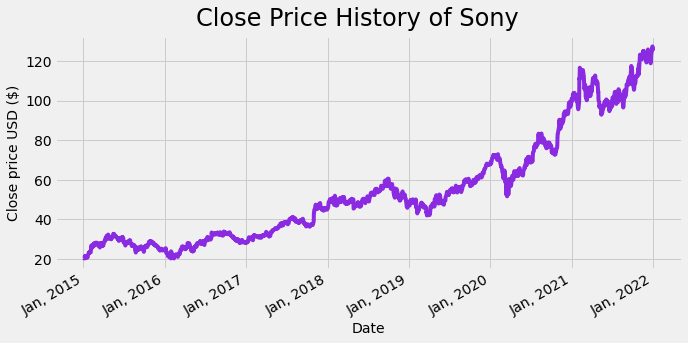

time: 293 ms (started: 2022-11-16 02:16:49 +00:00)


In [ ]:
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator
#Visualize the closing price history of Sony
fig, axs = plt.subplots(figsize=(10, 4))
fig.suptitle('Close Price History of Sony', size=24)
axs.plot(data['Close'], color = 'blueviolet')
axs.xaxis.set_major_formatter(mdates.DateFormatter('%b, %Y'))
axs.set_xlabel('Date',fontsize=14)
axs.set_ylabel('Close price USD ($)',fontsize=14)
for label in axs.get_xticklabels():
    label.set(rotation=30, horizontalalignment='right')
axs.tick_params(axis=u'both', which=u'both',length=0)
axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())
plt.show()

# Preprocessing

In [ ]:
df = data.reset_index(level=0)

time: 5.51 ms (started: 2022-11-16 02:16:49 +00:00)


In [ ]:
length_data = len(df)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data size:", length_data)
print("Train data size:", length_train)
print("Validation data size:", length_validation)

Data size: 1763
Train data size: 1234
Validation data size: 529
time: 1.39 ms (started: 2022-11-16 02:16:49 +00:00)


In [ ]:
trainData = df[:length_train].loc[:,['Date','Close']] 
trainData['Date'] = pd.to_datetime(trainData['Date'])
trainData

,Date,Close
0,2015-01-02,20.559999
1,2015-01-05,20.260000
2,2015-01-06,20.250000
3,2015-01-07,21.530001
4,2015-01-08,21.559999
...,...,...
1229,2019-11-19,61.900002
1230,2019-11-20,61.480000
1231,2019-11-21,61.520000
1232,2019-11-22,61.200001


time: 24.4 ms (started: 2022-11-16 02:16:49 +00:00)


In [ ]:
testData = df[length_train:].loc[:,['Date','Close']] 
testData['Date'] = pd.to_datetime(testData['Date'])
testData

,Date,Close
1234,2019-11-26,63.150002
1235,2019-11-27,63.720001
1236,2019-11-29,63.480000
1237,2019-12-02,63.279999
1238,2019-12-03,64.589996
...,...,...
1758,2021-12-27,127.209999
1759,2021-12-28,127.480003
1760,2021-12-29,126.690002
1761,2021-12-30,125.919998


time: 18.5 ms (started: 2022-11-16 02:16:49 +00:00)


In [ ]:
# Normalised 

trainDs = np.reshape(trainData.Close.values, (-1,1))
#Normalisation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
trainDsS = scaler.fit_transform(trainDs)

time: 5.94 ms (started: 2022-11-16 02:16:49 +00:00)


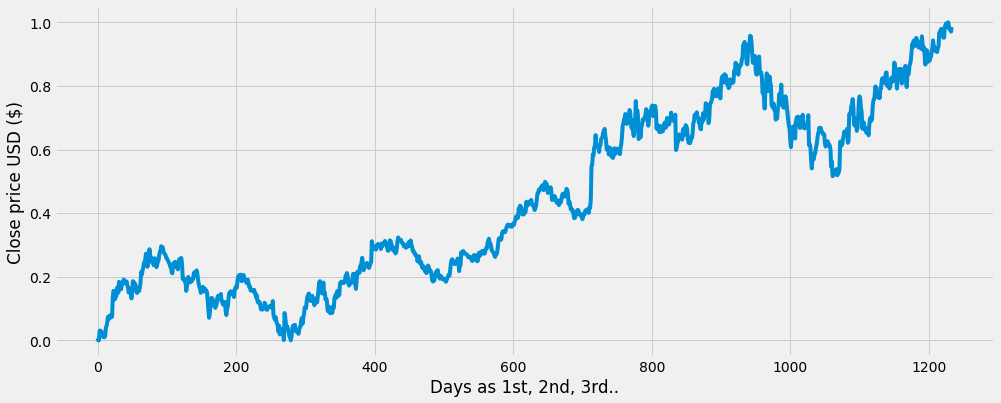

time: 303 ms (started: 2022-11-16 02:16:49 +00:00)


In [ ]:
plt.subplots(figsize = (15,6))
plt.plot(trainDsS)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Close price USD ($)")
plt.show()

## Generating the training dataset

In [ ]:
X_train = []
y_train = []

time_step = 30

for i in range(time_step, length_train):
    X_train.append(trainDsS[i-time_step:i,0])
    y_train.append(trainDsS[i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (1204, 30, 1)
Shape of y_train before reshape : (1204, 1)
time: 12.6 ms (started: 2022-11-16 02:16:50 +00:00)


# Initial models

## RNN Model

In [ ]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
model = Sequential()

model.add(SimpleRNN(units = 30,activation = "tanh", return_sequences = True, input_shape = (X_train.shape[1],1)))

model.add(SimpleRNN(units = 30, activation = "tanh", return_sequences = True))

model.add(SimpleRNN(units = 30, activation = "tanh", return_sequences = True))

model.add(SimpleRNN(units = 30, activation = "tanh"))


# adding the output layer
model.add(Dense(units = 1))

# compiling RNN
model.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = model.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
38/38 [==============================] - 5s 37ms/step - loss: 0.0416 - accuracy: 0.0000e+00
Epoch 2/50
38/38 [==============================] - 2s 40ms/step - loss: 0.0026 - accuracy: 8.3056e-04
Epoch 3/50
38/38 [==============================] - 2s 45ms/step - loss: 0.0020 - accuracy: 8.3056e-04
Epoch 4/50
38/38 [==============================] - 2s 42ms/step - loss: 0.0014 - accuracy: 8.3056e-04
Epoch 5/50
38/38 [==============================] - 2s 55ms/step - loss: 0.0011 - accuracy: 8.3056e-04
Epoch 6/50
38/38 [==============================] - 2s 56ms/step - loss: 0.0010 - accuracy: 8.3056e-04
Epoch 7/50
38/38 [==============================] - 1s 39ms/step - loss: 8.8924e-04 - accuracy: 8.3056e-04
Epoch 8/50
38/38 [==============================] - 2s 46ms/step - loss: 0.0010 - accuracy: 8.3056e-04
Epoch 9/50
38/38 [==============================] - 2s 45ms/step - loss: 9.0039e-04 - accuracy: 8.3056e-04
Epoch 10/50
38/38 [==============================] - 2s 48ms/step

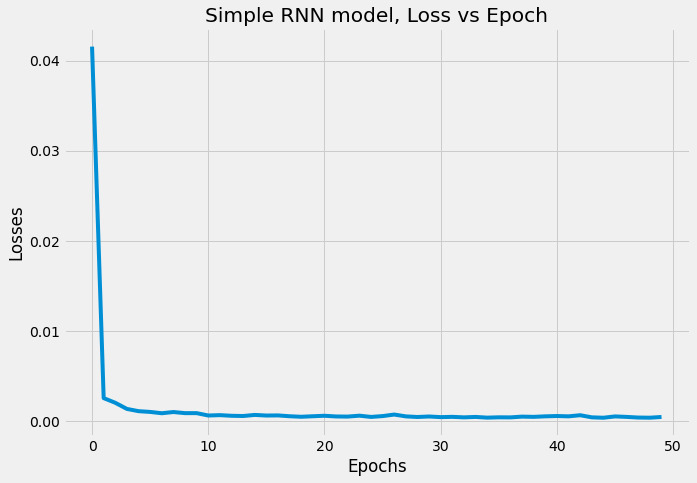

time: 229 ms (started: 2022-11-14 03:24:12 +00:00)


In [ ]:
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

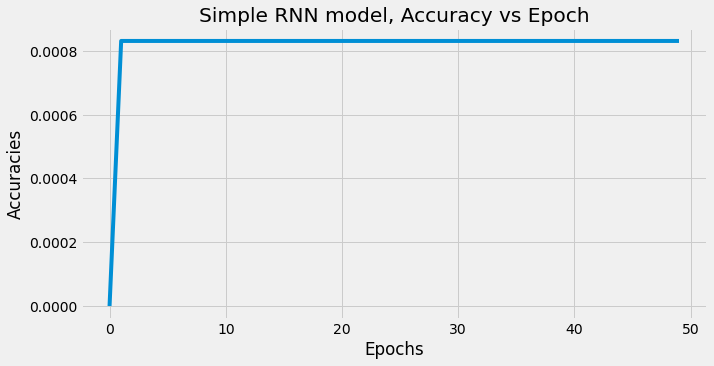

time: 164 ms (started: 2022-11-14 03:24:12 +00:00)


In [ ]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

Model predictions for train data

In [ ]:
y_pred = model.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

38/38 [==============================] - 1s 7ms/step


(1204, 1)

time: 834 ms (started: 2022-11-14 03:24:12 +00:00)


In [ ]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(1204, 1)

time: 7.51 ms (started: 2022-11-14 03:24:13 +00:00)


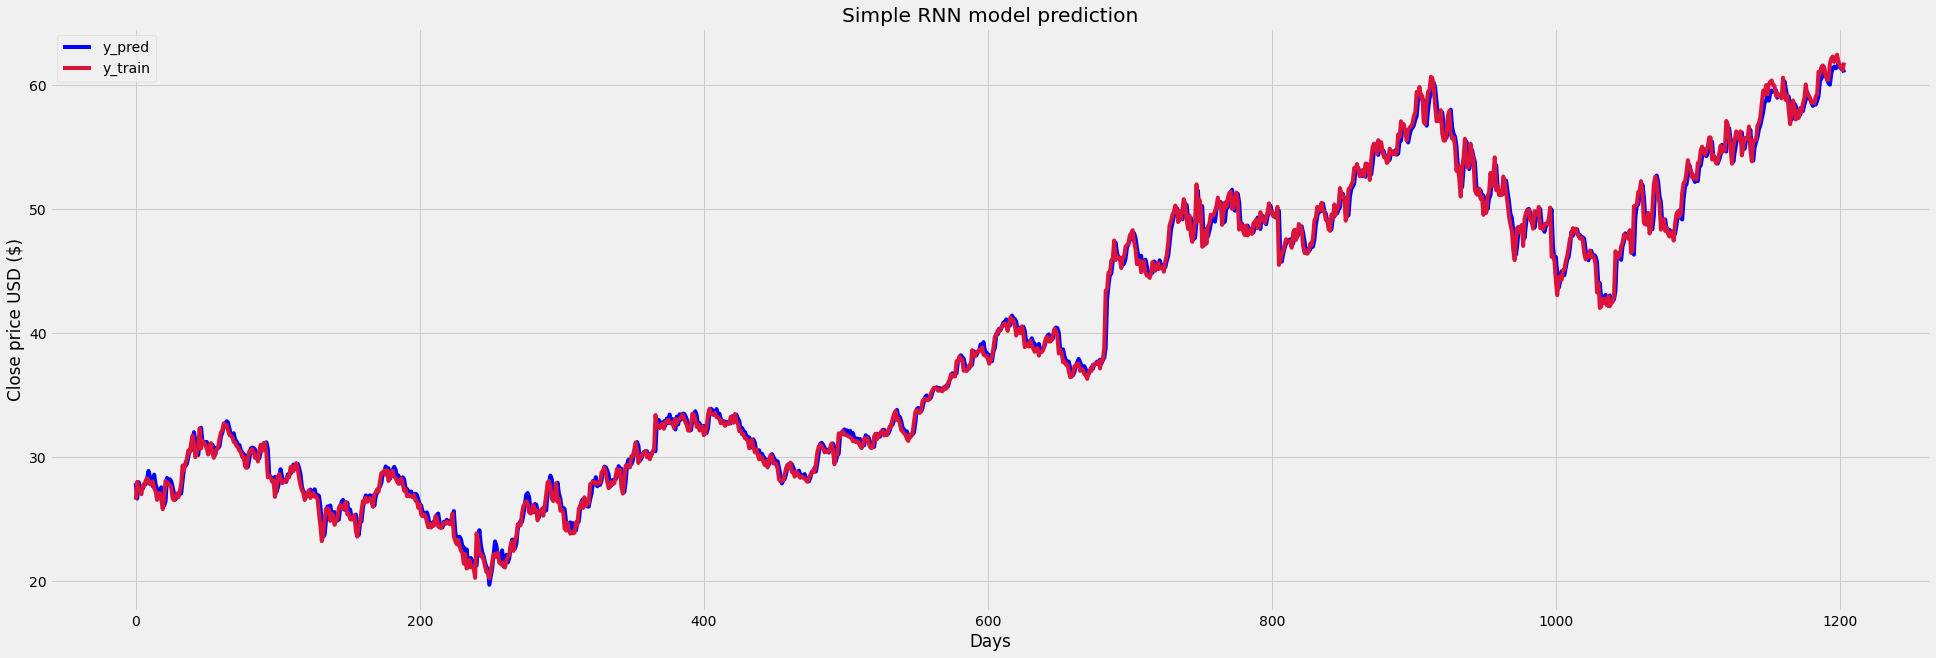

In [ ]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "crimson", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Close price USD ($)")
plt.title("Simple RNN model prediction")
plt.legend()
plt.show()

In [ ]:
pred_error = y_pred - y_train
print(f'Max error: {np.max(np.abs(pred_error)):.2f}')
print(f'Min error: {np.min(np.abs(pred_error)):.2f}')
print(f'Mean error: {np.mean(np.abs(pred_error)):.2f}')

time: 369 ms (started: 2022-11-14 03:24:13 +00:00)
Max error: 4.59
Min error: 0.00
Mean error: 0.55
time: 1.87 ms (started: 2022-11-14 03:24:13 +00:00)


### Testing

In [ ]:
# Normalised 
testDs = np.reshape(testData.Close.values, (-1,1))
#Normalisation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
testDsS = scaler.fit_transform(testDs)
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(testDsS[i-time_step:i,0])
    y_test.append(testDsS[i,0])

# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (499, 30, 1)
Shape of y_test after reshape : (499, 1)
time: 11.8 ms (started: 2022-11-14 06:49:00 +00:00)


In [ ]:
# predictions with X_test data
y_pred_of_test = model.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

16/16 [==============================] - 0s 7ms/step
Shape of y_pred_of_test : (499, 1)
time: 201 ms (started: 2022-11-14 03:24:13 +00:00)


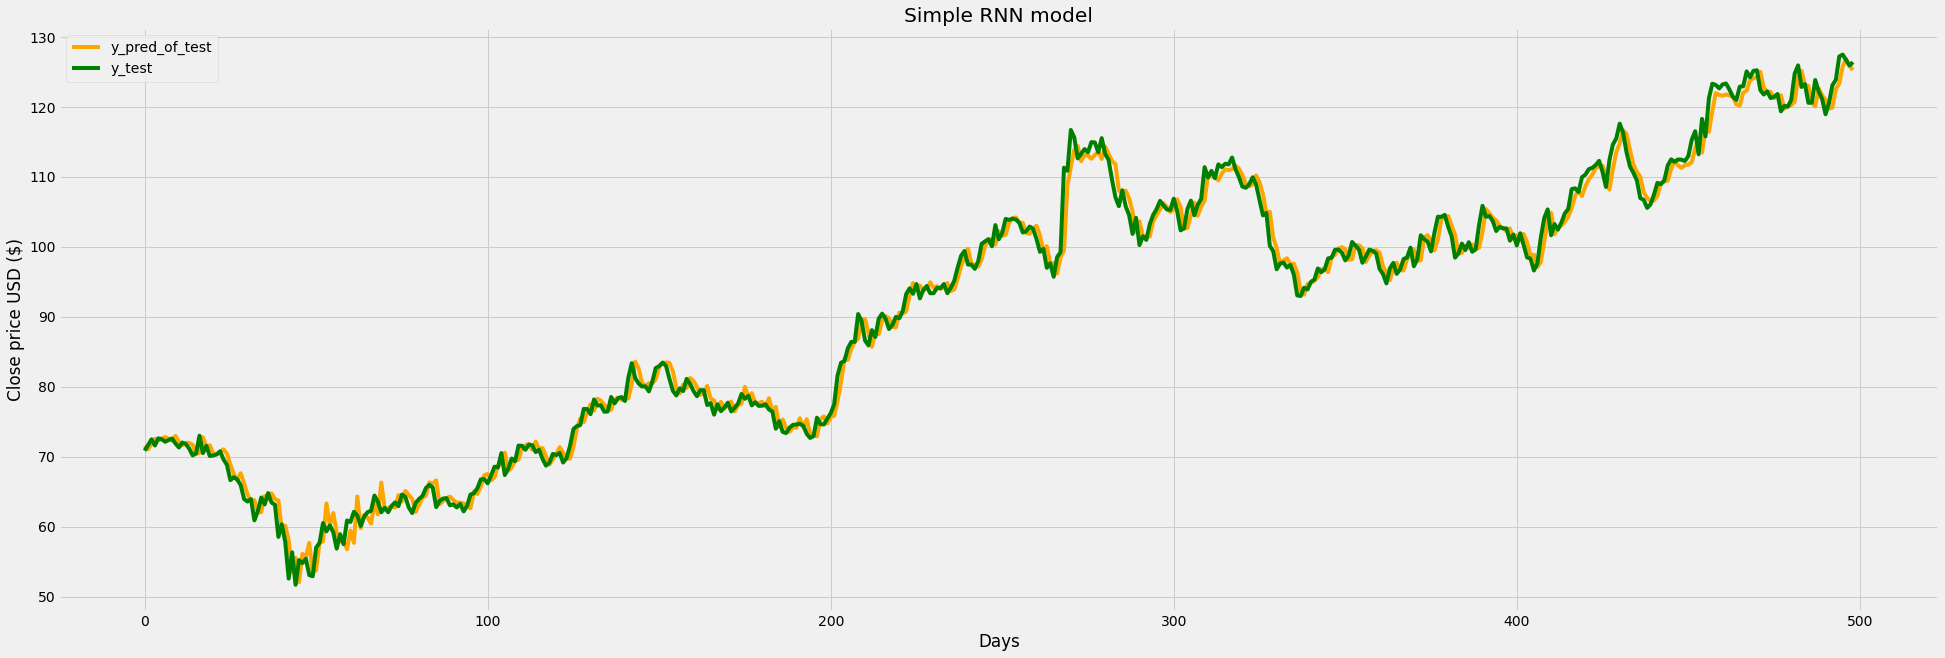

time: 385 ms (started: 2022-11-14 03:24:13 +00:00)


In [ ]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Close price USD ($)")
plt.title("Simple RNN model")
plt.legend()
plt.show()

In [ ]:
test_pred_error = y_pred_of_test - scaler.inverse_transform(y_test)
print(f'Max test error: {np.max(np.abs(test_pred_error)):.2f}')
print(f'Min test error: {np.min(np.abs(test_pred_error)):.2f}')
print(f'Mean test error: {np.mean(np.abs(test_pred_error)):.2f}')

Max test error: 11.84
Min test error: 0.00
Mean test error: 1.32
time: 5.47 ms (started: 2022-11-14 03:24:14 +00:00)


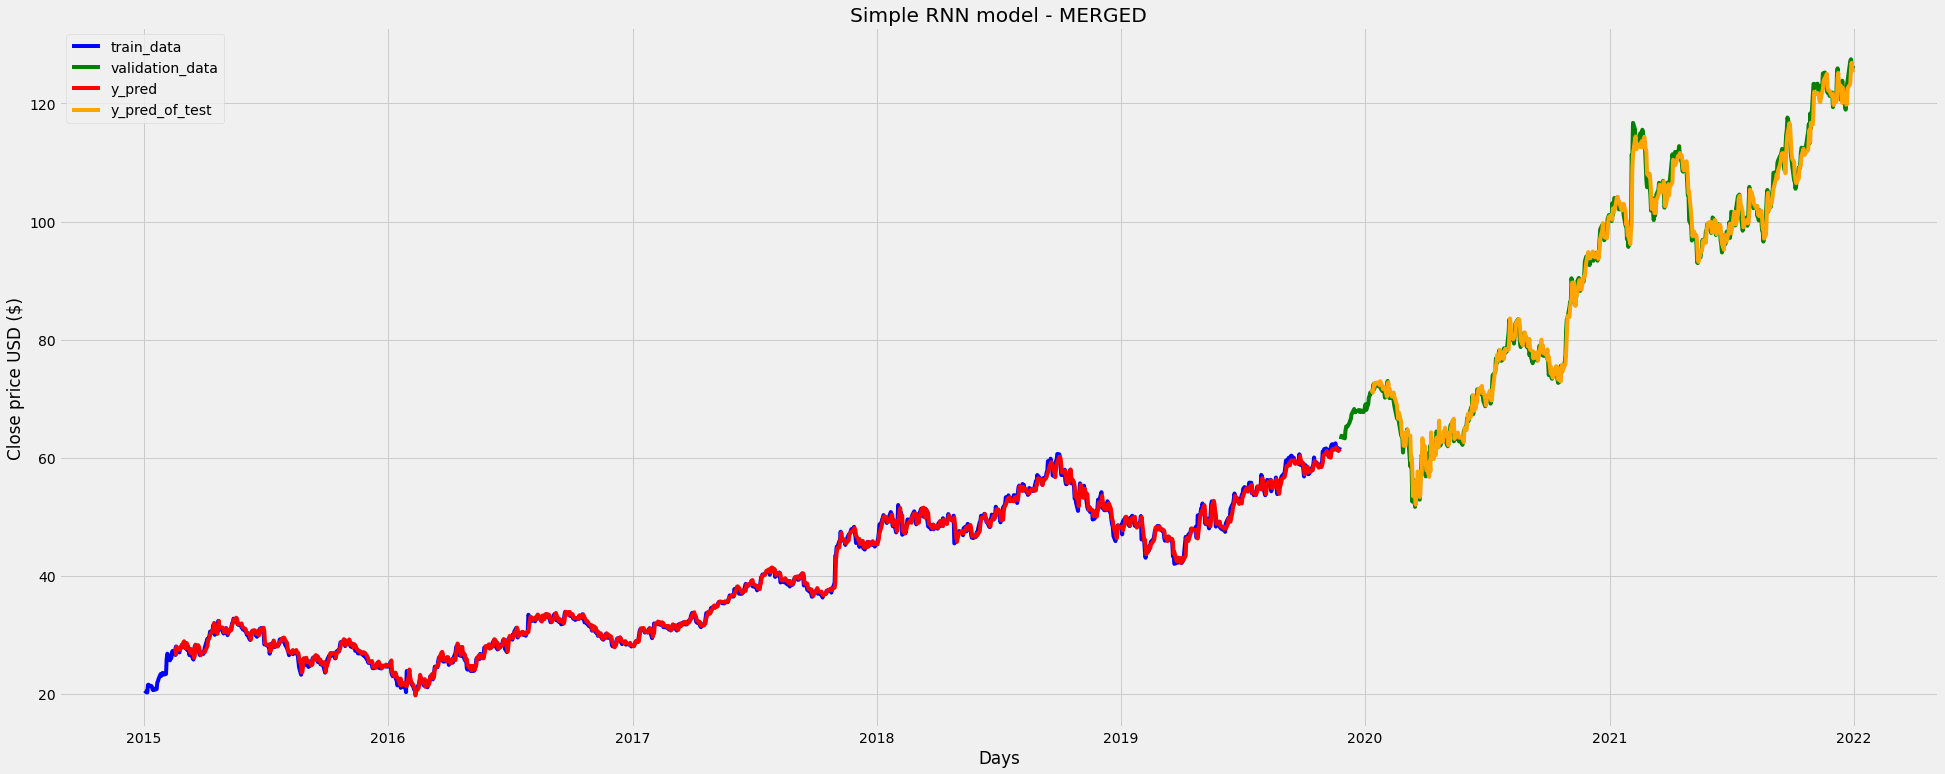

time: 402 ms (started: 2022-11-14 03:24:14 +00:00)


In [ ]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(trainData.Date, trainData.Close, label = "train_data", color = "b")
plt.plot(testData.Date, testData.Close, label = "validation_data", color = "g")
plt.plot(trainData.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(testData.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Close price USD ($)")
plt.title("Simple RNN model - MERGED")
plt.legend()
plt.show()

## LSTM

In [ ]:
y_train = scaler.fit_transform(y_train)

from keras.layers import LSTM

LSTM_model = Sequential()
LSTM_model.add(LSTM(30, activation = "tanh", return_sequences = True, input_shape = (X_train.shape[1],1))) #64 lstm neuron block
LSTM_model.add(LSTM(30, activation = "tanh", return_sequences = True))
LSTM_model.add(LSTM(30, activation = "tanh", return_sequences = True))
LSTM_model.add(LSTM(30, activation = "tanh"))
# LSTM_model.add(LSTM(30, return_sequences= True))
# LSTM_model.add(Dense(32))
LSTM_model.add(Dense(1))
LSTM_model.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = LSTM_model.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
38/38 [==============================] - 11s 49ms/step - loss: 0.0459 - accuracy: 0.0017
Epoch 2/50
38/38 [==============================] - 2s 50ms/step - loss: 0.0033 - accuracy: 0.0017
Epoch 3/50
38/38 [==============================] - 2s 48ms/step - loss: 0.0027 - accuracy: 0.0017
Epoch 4/50
38/38 [==============================] - 2s 51ms/step - loss: 0.0025 - accuracy: 0.0017
Epoch 5/50
38/38 [==============================] - 2s 50ms/step - loss: 0.0025 - accuracy: 0.0017
Epoch 6/50
38/38 [==============================] - 2s 49ms/step - loss: 0.0024 - accuracy: 0.0017
Epoch 7/50
38/38 [==============================] - 2s 49ms/step - loss: 0.0023 - accuracy: 0.0017
Epoch 8/50
38/38 [==============================] - 2s 49ms/step - loss: 0.0023 - accuracy: 0.0017
Epoch 9/50
38/38 [==============================] - 2s 50ms/step - loss: 0.0022 - accuracy: 0.0017
Epoch 10/50
38/38 [==============================] - 2s 49ms/step - loss: 0.0024 - accuracy: 0.0017
Epoch 11

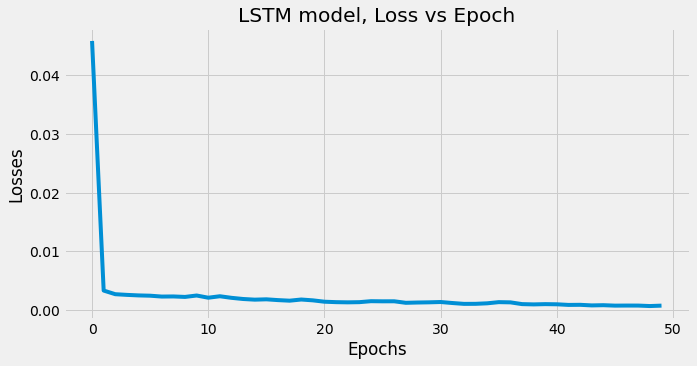

time: 183 ms (started: 2022-11-14 03:26:03 +00:00)


In [ ]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Loss vs Epoch")
plt.show()

In [ ]:
# Normalised 
testDs = np.reshape(testData.Close.values, (-1,1))
#Normalisation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
testDsS = scaler.fit_transform(testDs)
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(testDsS[i-time_step:i,0])
    y_test.append(testDsS[i,0])

# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (499, 30, 1)
Shape of y_test after reshape : (499, 1)
time: 10.8 ms (started: 2022-11-14 03:26:03 +00:00)


In [ ]:
LSTM_yPred_of_test = LSTM_model.predict(X_test)

16/16 [==============================] - 2s 14ms/step
time: 2.25 s (started: 2022-11-14 03:26:03 +00:00)


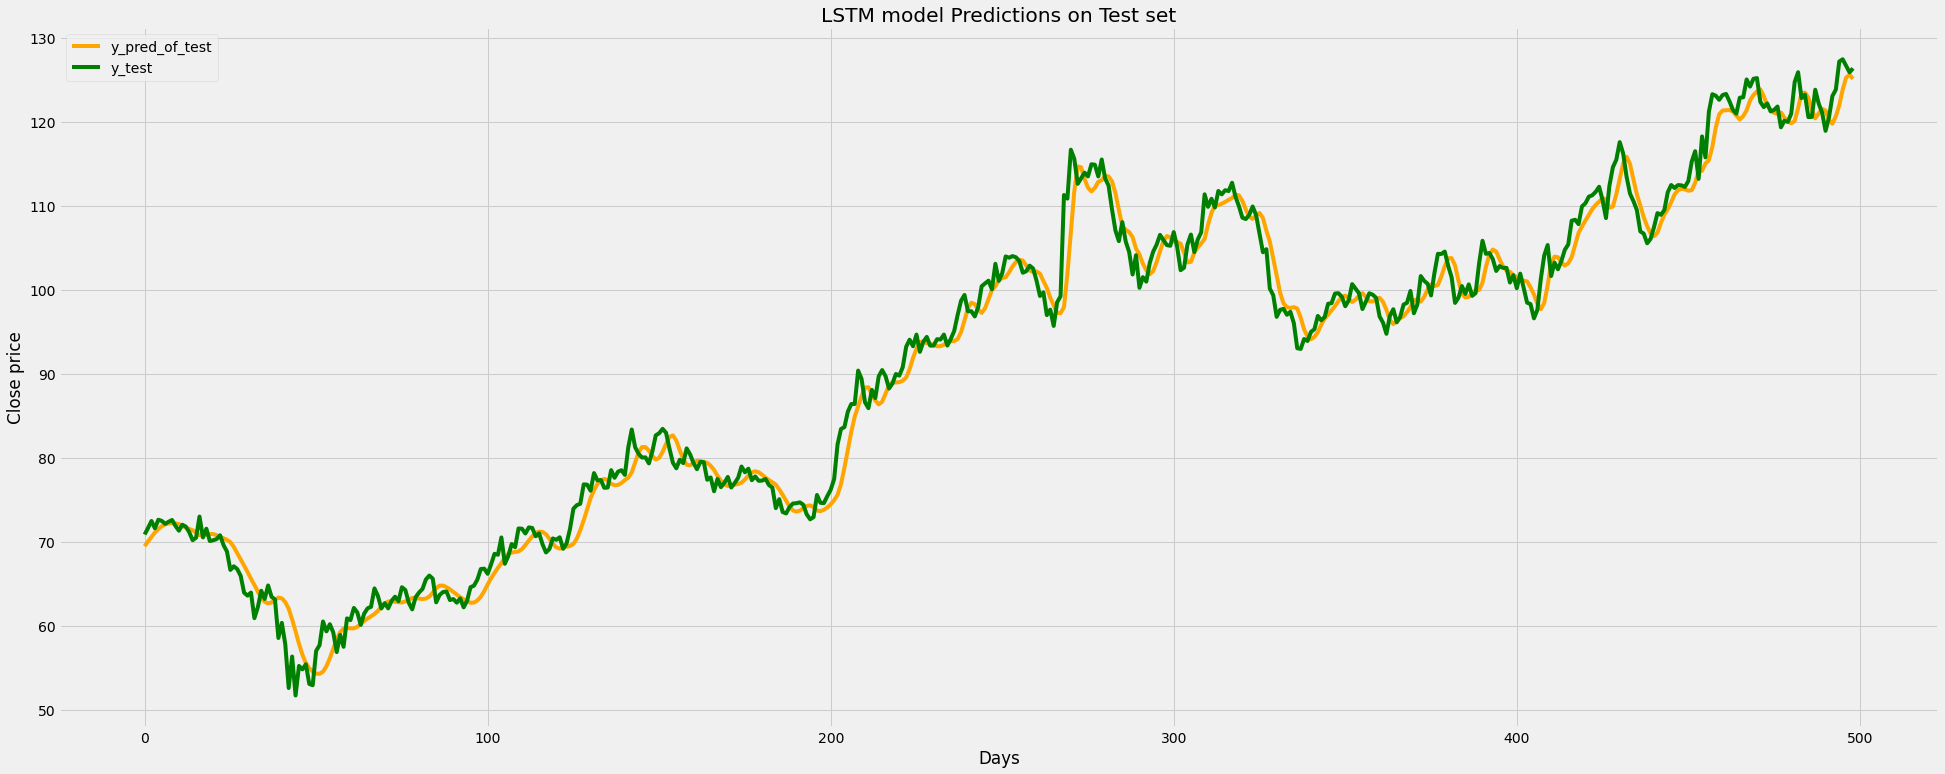

time: 398 ms (started: 2022-11-14 03:26:05 +00:00)


In [ ]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(LSTM_yPred_of_test), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.title("LSTM model Predictions on Test set")
plt.legend()
plt.show()

In [ ]:
LSTM_pred_error = scaler.inverse_transform(LSTM_model.predict(X_test)) - scaler.inverse_transform(y_test)
print(f'Max error: {np.max(np.abs(LSTM_pred_error)):.2f}')
print(f'Min error: {np.min(np.abs(LSTM_pred_error)):.2f}')
print(f'Mean error: {np.mean(np.abs(LSTM_pred_error)):.2f}')

16/16 [==============================] - 0s 14ms/step
Max error: 13.36
Min error: 0.00
Mean error: 1.75
time: 301 ms (started: 2022-11-14 03:26:05 +00:00)


## Gated Recurrent Unit Networks

In [ ]:
from keras.layers import GRU
from keras.optimizers import SGD, Adam

y_train = scaler.fit_transform(y_train)

# The GRU architecture
GRU_model = Sequential()

GRU_model.add(GRU(units=30,  activation = "tanh", return_sequences = True, input_shape=(X_train.shape[1],1)))

GRU_model.add(GRU(units=30, activation = "tanh", return_sequences = True))

GRU_model.add(GRU(units=30, activation = "tanh", return_sequences = True))

GRU_model.add(GRU(units=30, activation='tanh'))
# GRU_model.add(Dropout(0.2))

GRU_model.add(Dense(units=1))
# Compiling the RNN
GRU_model.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])

time: 1.42 s (started: 2022-11-16 02:16:50 +00:00)


In [ ]:
# Fitting to the training set
history3 = GRU_model.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
38/38 [==============================] - 17s 108ms/step - loss: 0.0342 - accuracy: 0.0017
Epoch 2/50
38/38 [==============================] - 4s 106ms/step - loss: 0.0015 - accuracy: 0.0017
Epoch 3/50
38/38 [==============================] - 4s 95ms/step - loss: 0.0011 - accuracy: 0.0017
Epoch 4/50
38/38 [==============================] - 4s 95ms/step - loss: 0.0011 - accuracy: 0.0017
Epoch 5/50
38/38 [==============================] - 3s 71ms/step - loss: 9.1702e-04 - accuracy: 0.0017
Epoch 6/50
38/38 [==============================] - 2s 53ms/step - loss: 8.9979e-04 - accuracy: 0.0017
Epoch 7/50
38/38 [==============================] - 2s 54ms/step - loss: 8.2929e-04 - accuracy: 0.0017
Epoch 8/50
38/38 [==============================] - 2s 54ms/step - loss: 8.6927e-04 - accuracy: 0.0017
Epoch 9/50
38/38 [==============================] - 2s 54ms/step - loss: 7.8199e-04 - accuracy: 0.0017
Epoch 10/50
38/38 [==============================] - 2s 54ms/step - loss: 7.0199e-04 -

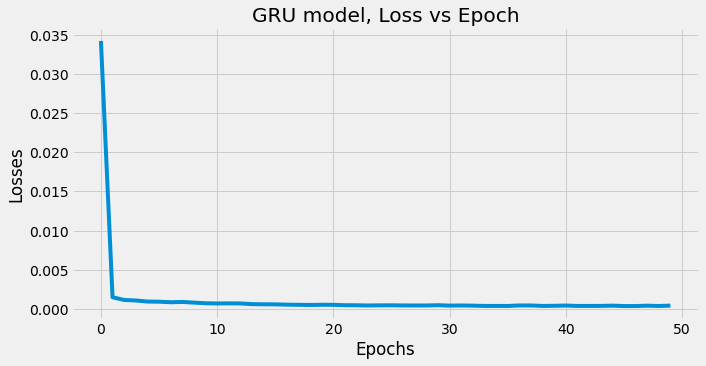

time: 171 ms (started: 2022-11-16 02:19:02 +00:00)


In [ ]:
plt.figure(figsize =(10,5))
plt.plot(history3.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("GRU model, Loss vs Epoch")
plt.show()

In [ ]:
# Normalised 
testDs = np.reshape(testData.Close.values, (-1,1))
#Normalisation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
testDsS = scaler.fit_transform(testDs)
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(testDsS[i-time_step:i,0])
    y_test.append(testDsS[i,0])

# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (499, 30, 1)
Shape of y_test after reshape : (499, 1)
time: 9.41 ms (started: 2022-11-16 02:19:02 +00:00)


16/16 [==============================] - 2s 12ms/step


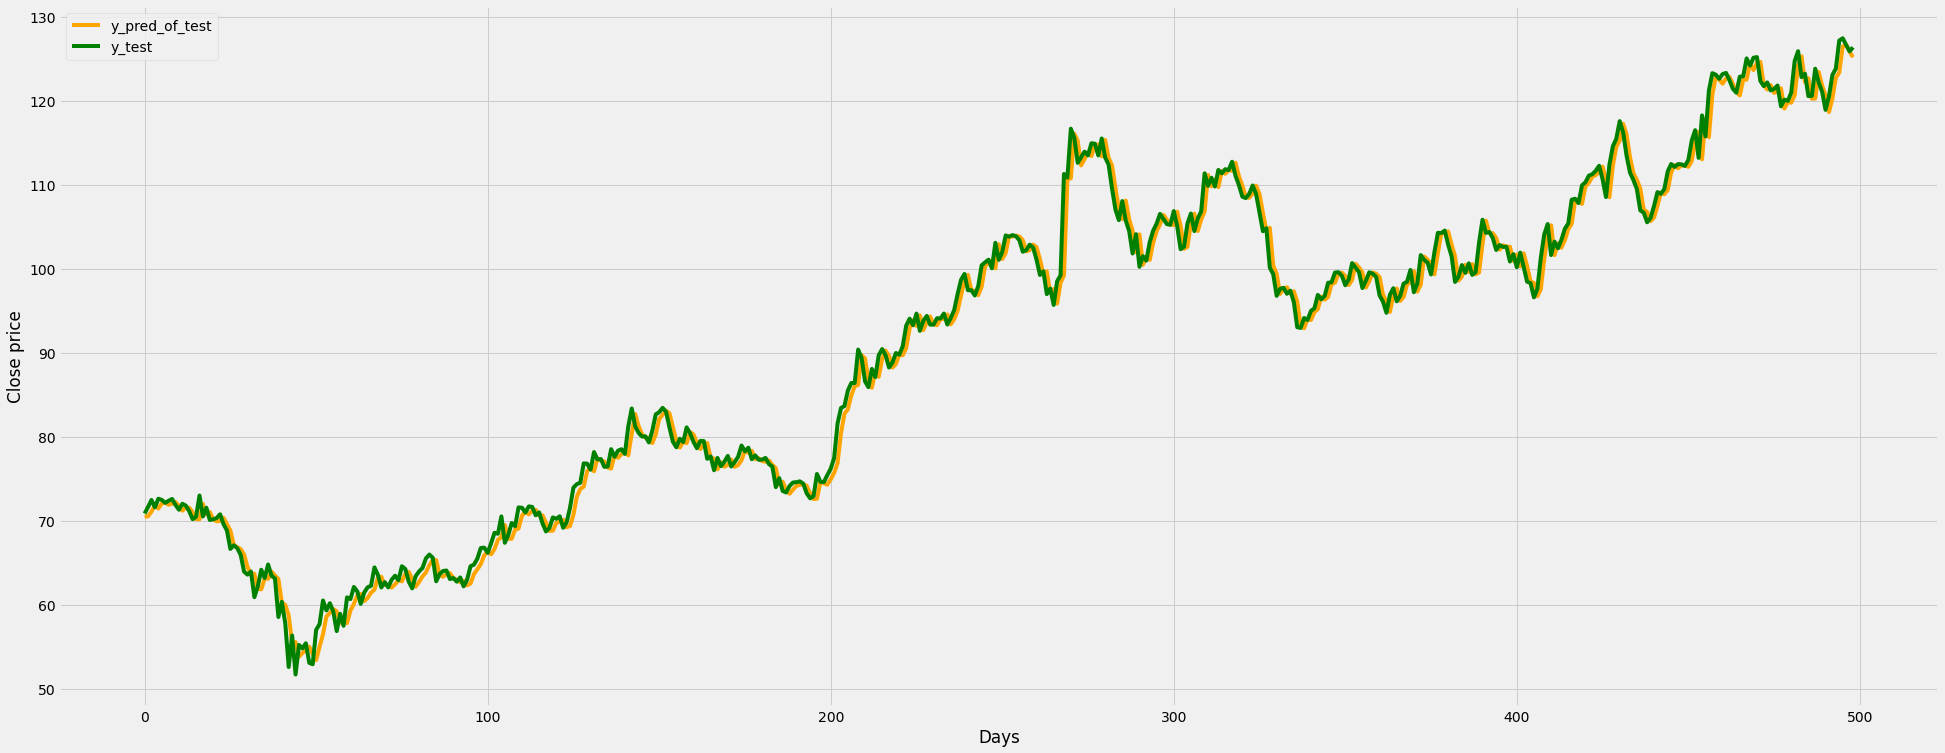

time: 2.61 s (started: 2022-11-16 02:19:02 +00:00)


In [ ]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(GRU_model.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Close price")
# plt.title("GRU model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [ ]:
GRU_pred_error = scaler.inverse_transform(GRU_model.predict(X_test)) - scaler.inverse_transform(y_test)
print(f'Max error: {np.max(np.abs(GRU_pred_error)):.2f}')
print(f'Min error: {np.min(np.abs(GRU_pred_error)):.2f}')
print(f'Mean error: {np.mean(np.abs(GRU_pred_error)):.2f}')

16/16 [==============================] - 0s 12ms/step
Max error: 12.08
Min error: 0.01
Mean error: 1.25
time: 263 ms (started: 2022-11-16 02:19:04 +00:00)


# Gradient clipping

### Normal GRU model with SGD

In [ ]:
from keras.layers import GRU
from keras.optimizers import SGD, Adam
y_train = scaler.fit_transform(y_train)

# The GRU architecture
cModel = Sequential()

cModel.add(GRU(units=30,  activation = "tanh", return_sequences = True, input_shape=(X_train.shape[1],1)))

cModel.add(GRU(units=30, activation = "tanh", return_sequences = True))

cModel.add(GRU(units=30, activation = "tanh", return_sequences = True))

cModel.add(GRU(units=30, activation='tanh'))
# GRU_model.add(Dropout(0.2))

cModel.add(Dense(units=1))
# Compiling the RNN
cModel.compile(optimizer = SGD(), loss = "mean_squared_error",metrics = ["accuracy"])
# Fitting to the training set
historyOSGD = cModel.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
38/38 [==============================] - 10s 56ms/step - loss: 0.0977 - accuracy: 8.3056e-04
Epoch 2/50
38/38 [==============================] - 2s 56ms/step - loss: 0.0634 - accuracy: 8.3056e-04
Epoch 3/50
38/38 [==============================] - 2s 55ms/step - loss: 0.0527 - accuracy: 0.0017
Epoch 4/50
38/38 [==============================] - 2s 56ms/step - loss: 0.0424 - accuracy: 0.0017
Epoch 5/50
38/38 [==============================] - 2s 55ms/step - loss: 0.0325 - accuracy: 0.0017
Epoch 6/50
38/38 [==============================] - 2s 54ms/step - loss: 0.0231 - accuracy: 0.0017
Epoch 7/50
38/38 [==============================] - 2s 55ms/step - loss: 0.0150 - accuracy: 0.0017
Epoch 8/50
38/38 [==============================] - 2s 57ms/step - loss: 0.0088 - accuracy: 0.0017
Epoch 9/50
38/38 [==============================] - 2s 57ms/step - loss: 0.0049 - accuracy: 0.0017
Epoch 10/50
38/38 [==============================] - 2s 55ms/step - loss: 0.0028 - accuracy: 0.0017


In [ ]:
# Normalised 
testDs = np.reshape(testData.Close.values, (-1,1))
#Normalisation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
testDsS = scaler.fit_transform(testDs)
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(testDsS[i-time_step:i,0])
    y_test.append(testDsS[i,0])

# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

time: 8.29 ms (started: 2022-11-15 10:59:11 +00:00)


16/16 [==============================] - 2s 12ms/step


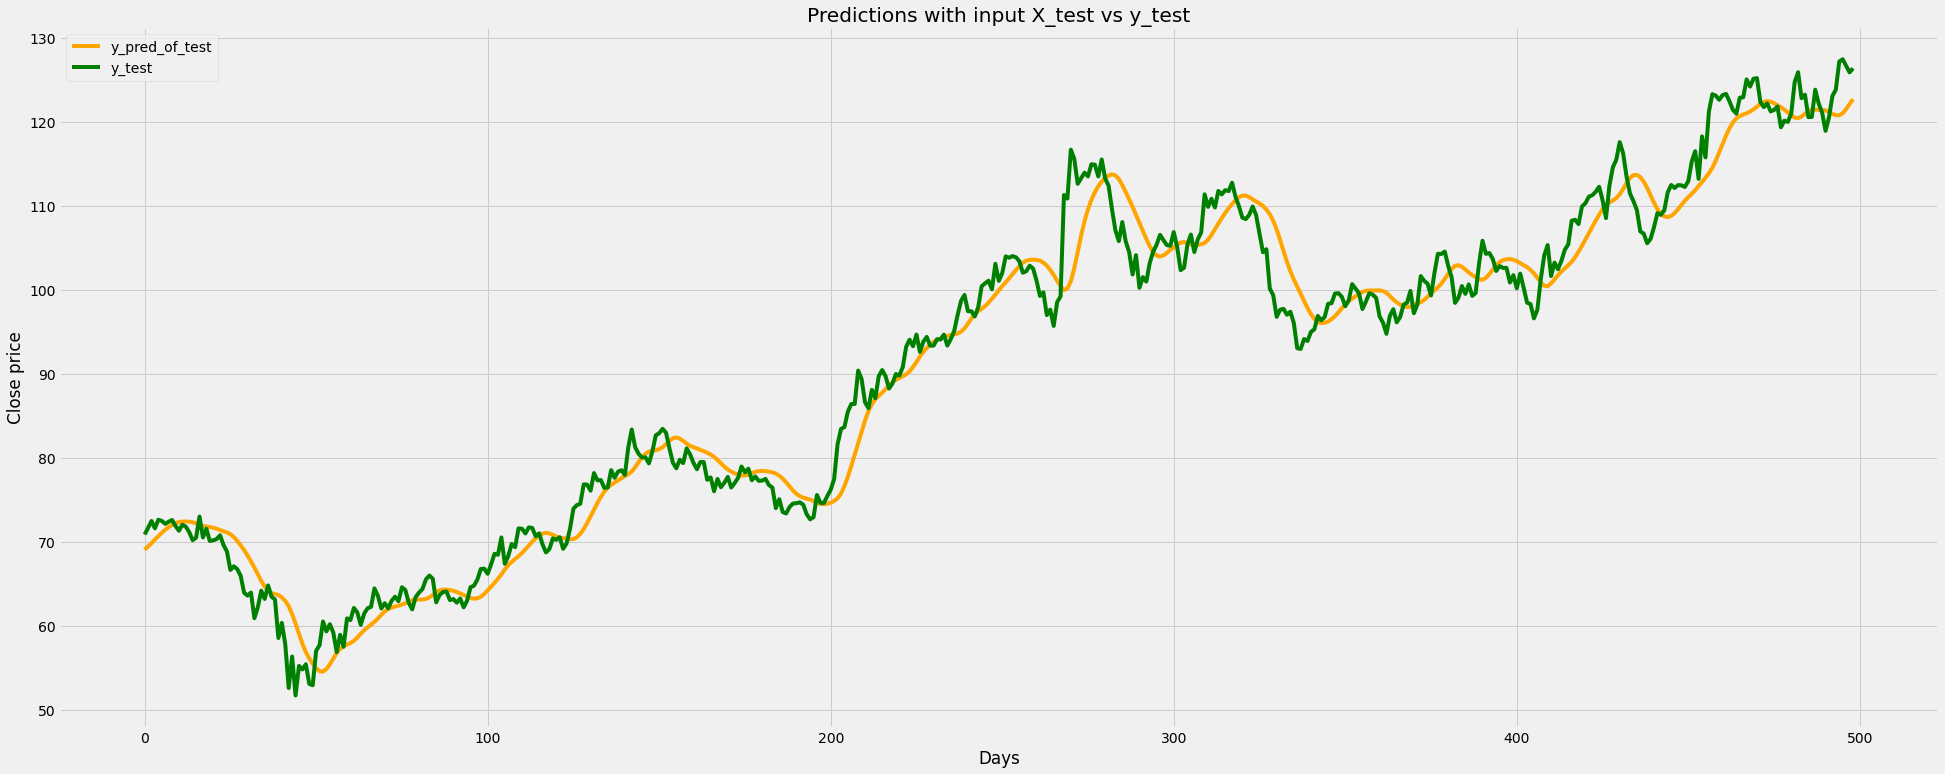

time: 2.27 s (started: 2022-11-15 10:59:11 +00:00)


In [ ]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(cModel.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.title("Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [ ]:
cM_pred_error = scaler.inverse_transform(cModel.predict(X_test)) - scaler.inverse_transform(y_test)
print(f'Max error: {np.max(np.abs(cM_pred_error)):.2f}')
print(f'Min error: {np.min(np.abs(cM_pred_error)):.2f}')
print(f'Mean error: {np.mean(np.abs(cM_pred_error)):.2f}')

16/16 [==============================] - 0s 14ms/step
Max error: 15.68
Min error: 0.01
Mean error: 2.59
time: 375 ms (started: 2022-11-15 10:59:14 +00:00)


### Clipping applied

In [ ]:
from keras.layers import GRU
from keras.optimizers import SGD, Adam

y_train = scaler.fit_transform(y_train)

# The GRU architecture
cModel = Sequential()

cModel.add(GRU(units=30,  activation = "tanh", return_sequences = True, input_shape=(X_train.shape[1],1)))

cModel.add(GRU(units=30, activation = "tanh", return_sequences = True))

cModel.add(GRU(units=30, activation = "tanh", return_sequences = True))

cModel.add(GRU(units=30, activation='tanh'))
# GRU_model.add(Dropout(0.2))

cModel.add(Dense(units=1))
# Compiling the RNN
cModel.compile(optimizer = SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, clipnorm=1.0, nesterov=False), loss = "mean_squared_error",metrics = ["accuracy"])
# Fitting to the training set
history4 = cModel.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
38/38 [==============================] - 10s 54ms/step - loss: 0.0850 - accuracy: 8.3056e-04
Epoch 2/50
38/38 [==============================] - 2s 54ms/step - loss: 0.0063 - accuracy: 0.0017
Epoch 3/50
38/38 [==============================] - 3s 67ms/step - loss: 0.0012 - accuracy: 0.0017
Epoch 4/50
38/38 [==============================] - 3s 77ms/step - loss: 0.0010 - accuracy: 0.0017
Epoch 5/50
38/38 [==============================] - 2s 54ms/step - loss: 0.0010 - accuracy: 0.0017
Epoch 6/50
38/38 [==============================] - 2s 54ms/step - loss: 0.0011 - accuracy: 0.0017
Epoch 7/50
38/38 [==============================] - 2s 53ms/step - loss: 0.0011 - accuracy: 0.0017
Epoch 8/50
38/38 [==============================] - 2s 53ms/step - loss: 0.0010 - accuracy: 0.0017
Epoch 9/50
38/38 [==============================] - 2s 53ms/step - loss: 0.0011 - accuracy: 0.0017
Epoch 10/50
38/38 [==============================] - 2s 53ms/step - loss: 0.0011 - accuracy: 0.0017
Epoc

In [ ]:
# Normalised 
testDs = np.reshape(testData.Close.values, (-1,1))
#Normalisation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
testDsS = scaler.fit_transform(testDs)
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(testDsS[i-time_step:i,0])
    y_test.append(testDsS[i,0])

# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

time: 9.22 ms (started: 2022-11-14 03:30:35 +00:00)


16/16 [==============================] - 2s 11ms/step


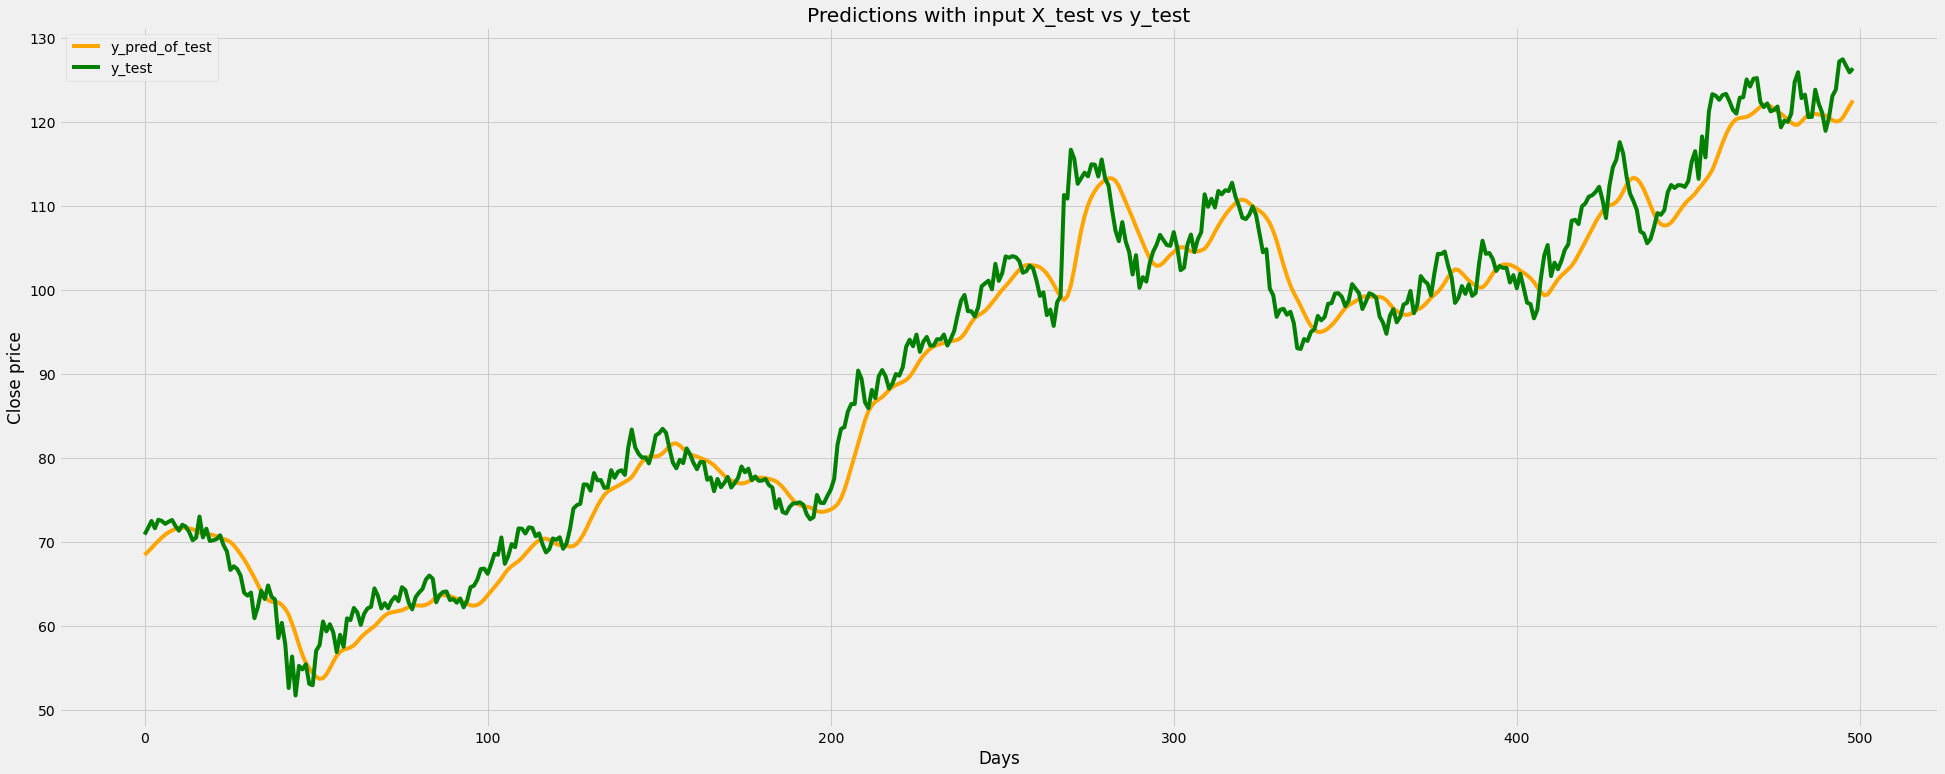

time: 2.47 s (started: 2022-11-14 03:30:35 +00:00)


In [ ]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(cModel.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.title("Predictions with input X_test vs y_test")
plt.legend()
plt.show()

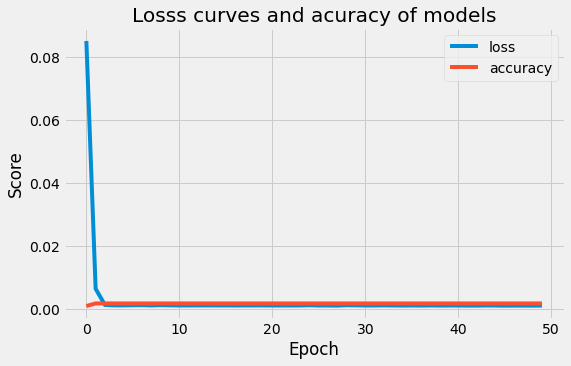

time: 199 ms (started: 2022-11-14 03:30:37 +00:00)


In [ ]:
pd.DataFrame(history4.history).plot(figsize=(8 , 5))
plt.title("Losss curves and acuracy of models")
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.show()

In [ ]:
cM_pred_error = scaler.inverse_transform(cModel.predict(X_test)) - scaler.inverse_transform(y_test)
print(f'Max error: {np.max(np.abs(cM_pred_error)):.2f}')
print(f'Min error: {np.min(np.abs(cM_pred_error)):.2f}')
print(f'Mean error: {np.mean(np.abs(cM_pred_error)):.2f}')

16/16 [==============================] - 0s 12ms/step
Max error: 16.20
Min error: 0.00
Mean error: 2.55
time: 359 ms (started: 2022-11-14 03:30:37 +00:00)


# Drop out added

In [ ]:
from keras.layers import GRU
from keras.optimizers import SGD, Adam

y_train = scaler.fit_transform(y_train)

# The GRU architecture
cModel = Sequential()

cModel.add(GRU(units=30,  activation = "tanh", return_sequences = True, input_shape=(X_train.shape[1],1)))

cModel.add(GRU(units=30, activation = "tanh", return_sequences = True))
cModel.add(Dropout(0.1))

cModel.add(GRU(units=30, activation = "tanh", return_sequences = True))

cModel.add(GRU(units=30, activation='tanh'))
cModel.add(Dropout(0.1))

cModel.add(Dense(units=1))
# Compiling the RNN
cModel.compile(optimizer = SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False), loss = "mean_squared_error",metrics = ["accuracy"])
# Fitting to the training set
history5 = cModel.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
38/38 [==============================] - 11s 52ms/step - loss: 0.0697 - accuracy: 0.0017
Epoch 2/50
38/38 [==============================] - 2s 52ms/step - loss: 0.0049 - accuracy: 0.0017
Epoch 3/50
38/38 [==============================] - 2s 54ms/step - loss: 0.0029 - accuracy: 0.0017
Epoch 4/50
38/38 [==============================] - 2s 53ms/step - loss: 0.0031 - accuracy: 0.0017
Epoch 5/50
38/38 [==============================] - 2s 54ms/step - loss: 0.0029 - accuracy: 0.0017
Epoch 6/50
38/38 [==============================] - 2s 54ms/step - loss: 0.0026 - accuracy: 0.0017
Epoch 7/50
38/38 [==============================] - 2s 54ms/step - loss: 0.0026 - accuracy: 0.0017
Epoch 8/50
38/38 [==============================] - 2s 53ms/step - loss: 0.0024 - accuracy: 0.0017
Epoch 9/50
38/38 [==============================] - 2s 54ms/step - loss: 0.0023 - accuracy: 0.0017
Epoch 10/50
38/38 [==============================] - 2s 54ms/step - loss: 0.0022 - accuracy: 0.0017
Epoch 11

In [ ]:
testDs = np.reshape(testData.Close.values, (-1,1))
#Normalisation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
testDsS = scaler.fit_transform(testDs)
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(testDsS[i-time_step:i,0])
    y_test.append(testDsS[i,0])

# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

time: 6.52 ms (started: 2022-11-14 03:32:32 +00:00)


16/16 [==============================] - 2s 12ms/step


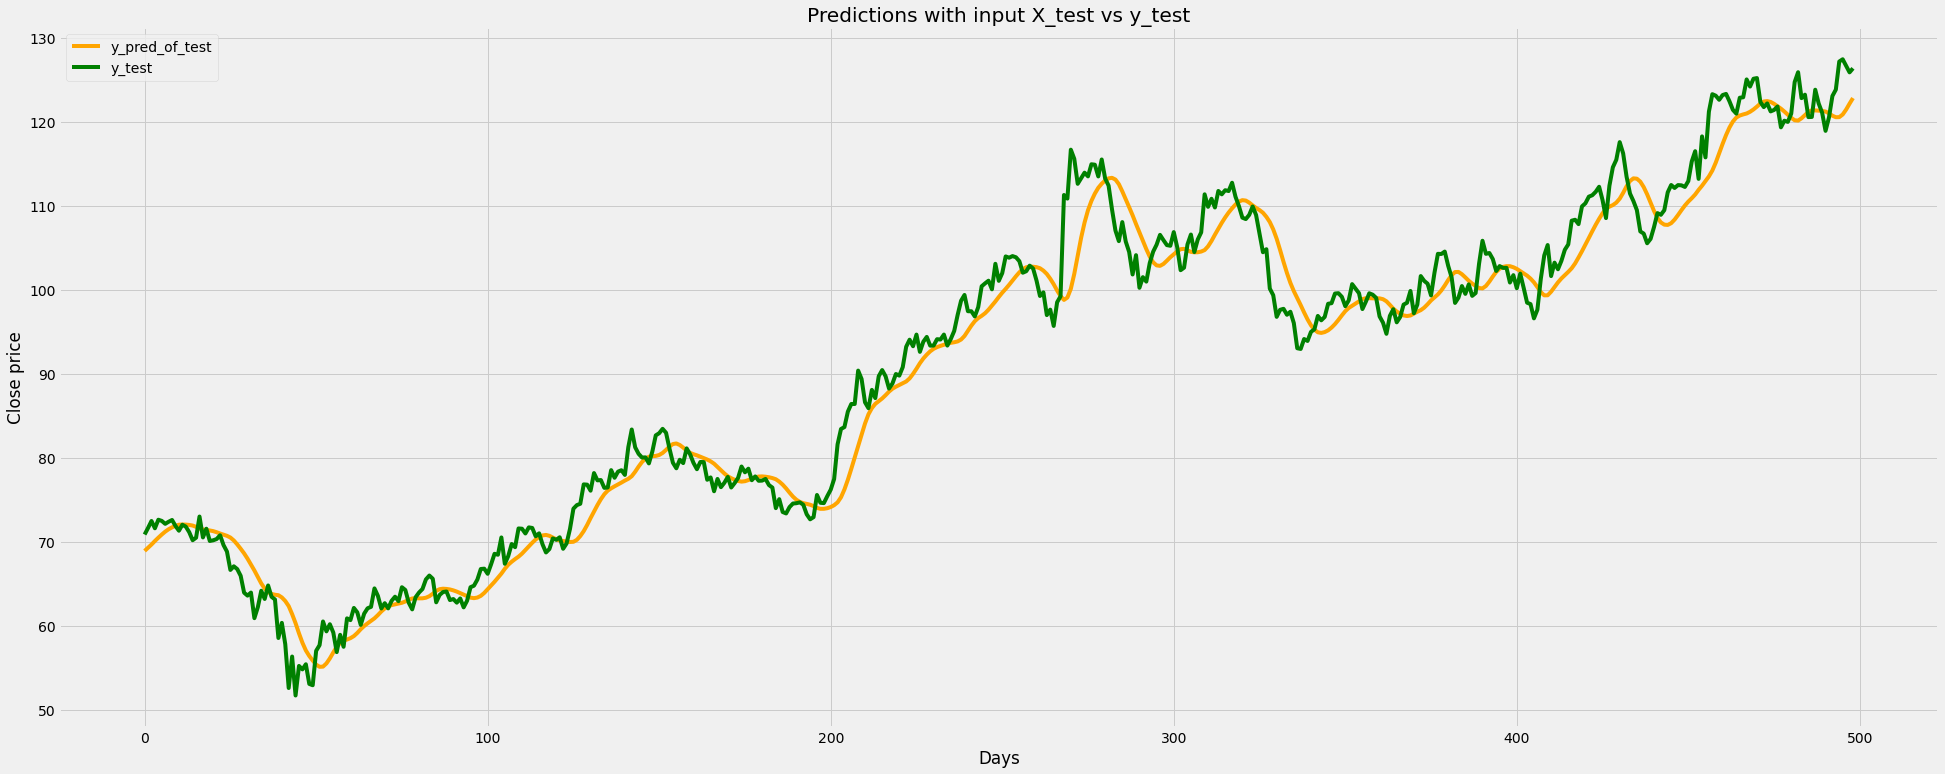

time: 2.43 s (started: 2022-11-14 03:32:32 +00:00)


In [ ]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(cModel.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.title("Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [ ]:
cM_pred_error = scaler.inverse_transform(cModel.predict(X_test)) - scaler.inverse_transform(y_test)
print(f'Max error: {np.max(np.abs(cM_pred_error)):.2f}')
print(f'Min error: {np.min(np.abs(cM_pred_error)):.2f}')
print(f'Mean error: {np.mean(np.abs(cM_pred_error)):.2f}')

16/16 [==============================] - 0s 12ms/step
Max error: 16.58
Min error: 0.02
Mean error: 2.59
time: 368 ms (started: 2022-11-14 03:32:35 +00:00)


# Normalisation added

In [ ]:
from keras.layers import GRU, LayerNormalization
from keras.optimizers import SGD, Adam

y_train = scaler.fit_transform(y_train)

# The GRU architecture
cModel = Sequential()

cModel.add(GRU(units=30,  activation = "tanh", return_sequences = True, input_shape=(X_train.shape[1],1)))

cModel.add(GRU(units=30, activation = "tanh", return_sequences = True))
cModel.add(LayerNormalization())

cModel.add(GRU(units=30, activation = "tanh", return_sequences = True))

cModel.add(GRU(units=30, activation='tanh'))
cModel.add(LayerNormalization())

cModel.add(Dense(units=1))
# Compiling the RNN
cModel.compile(optimizer = SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False), loss = "mean_squared_error",metrics = ["accuracy"])
# Fitting to the training set
history6 = cModel.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
38/38 [==============================] - 11s 55ms/step - loss: 2.1363 - accuracy: 8.3056e-04
Epoch 2/50
38/38 [==============================] - 2s 55ms/step - loss: 0.1096 - accuracy: 0.0017
Epoch 3/50
38/38 [==============================] - 2s 56ms/step - loss: 0.0867 - accuracy: 0.0017
Epoch 4/50
38/38 [==============================] - 2s 55ms/step - loss: 0.0797 - accuracy: 8.3056e-04
Epoch 5/50
38/38 [==============================] - 2s 55ms/step - loss: 0.0855 - accuracy: 0.0000e+00
Epoch 6/50
38/38 [==============================] - 2s 55ms/step - loss: 0.0788 - accuracy: 8.3056e-04
Epoch 7/50
38/38 [==============================] - 2s 55ms/step - loss: 0.0776 - accuracy: 0.0000e+00
Epoch 8/50
38/38 [==============================] - 2s 56ms/step - loss: 0.0827 - accuracy: 0.0017
Epoch 9/50
38/38 [==============================] - 2s 55ms/step - loss: 0.0787 - accuracy: 8.3056e-04
Epoch 10/50
38/38 [==============================] - 2s 55ms/step - loss: 0.0764 - a

In [ ]:
testDs = np.reshape(testData.Close.values, (-1,1))
#Normalisation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
testDsS = scaler.fit_transform(testDs)
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(testDsS[i-time_step:i,0])
    y_test.append(testDsS[i,0])

# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

time: 7.07 ms (started: 2022-11-14 03:35:06 +00:00)


16/16 [==============================] - 2s 12ms/step


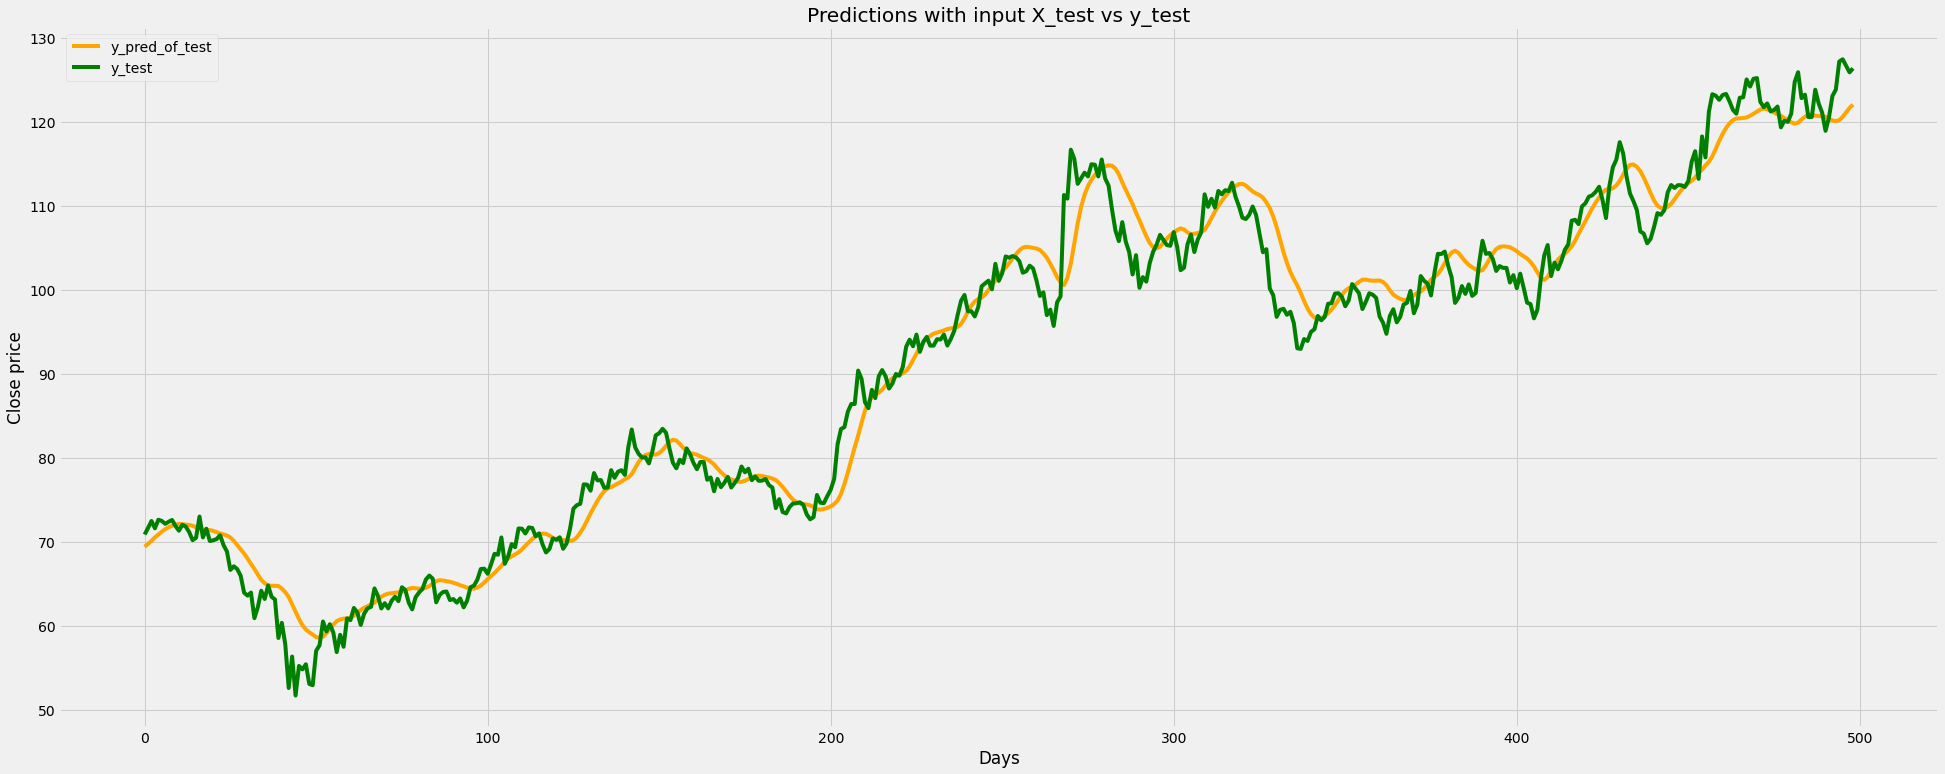

time: 2.54 s (started: 2022-11-14 03:35:06 +00:00)


In [ ]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(cModel.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.title("Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [ ]:
cM_pred_error = scaler.inverse_transform(cModel.predict(X_test)) - scaler.inverse_transform(y_test)
print(f'Max error: {np.max(np.abs(cM_pred_error)):.2f}')
print(f'Min error: {np.min(np.abs(cM_pred_error)):.2f}')
print(f'Mean error: {np.mean(np.abs(cM_pred_error)):.2f}')

16/16 [==============================] - 0s 13ms/step
Max error: 13.56
Min error: 0.00
Mean error: 2.37
time: 362 ms (started: 2022-11-14 03:35:09 +00:00)


# Interval test

In [ ]:
def generate_intervalDs(ds,time_step,s ='train'):
  X = []
  y = []

  for i in range(time_step, length_train if s == 'train' else length_validation):
      X.append(ds[i-time_step:i,0])
      y.append(ds[i,0])
      
  # convert list to array
  X, y = np.array(X), np.array(y)

  X = np.reshape(X, (X.shape[0], X.shape[1],1))
  if s == 'test':
      y = np.reshape(y, (-1,1))
  else:
      y = np.reshape(y, (y.shape[0],1))

  print("Shape of X before reshape :",X.shape)
  print("Shape of y before reshape :",y.shape)

  return X, y

time: 3.7 ms (started: 2022-11-14 04:49:50 +00:00)


### Interval 14

In [ ]:
X14_train, y14_train = generate_intervalDs(trainDsS, 14)
y14_train = scaler.fit_transform(y14_train)

testDs = np.reshape(testData.Close.values, (-1,1))
#Normalisation
scaler = MinMaxScaler(feature_range = (0,1))
testDsS = scaler.fit_transform(testDs)
X14_test, y14_test = generate_intervalDs(testDsS, 14, 'test')

Shape of X before reshape : (1220, 14, 1)
Shape of y before reshape : (1220, 1)
Shape of X before reshape : (515, 14, 1)
Shape of y before reshape : (515, 1)
time: 18.5 ms (started: 2022-11-14 05:09:20 +00:00)


In [ ]:
# The GRU architecture
GRU_model = Sequential()

GRU_model.add(GRU(units=30,  activation = "tanh", return_sequences = True, input_shape=(X14_train.shape[1],1)))

GRU_model.add(GRU(units=30, activation = "tanh", return_sequences = True))

GRU_model.add(GRU(units=30, activation = "tanh", return_sequences = True))

GRU_model.add(GRU(units=30, activation='tanh'))
# GRU_model.add(Dropout(0.2))

GRU_model.add(Dense(units=1))
# Compiling the RNN
GRU_model.compile(optimizer = "adam", loss = "mean_squared_error",metrics = ["accuracy"])

history10 = GRU_model.fit(X14_train, X14_train,epochs=50,batch_size=32)

Epoch 1/50
39/39 [==============================] - 12s 29ms/step - loss: 0.0415 - accuracy: 3.5129e-04
Epoch 2/50
39/39 [==============================] - 1s 30ms/step - loss: 0.0012 - accuracy: 4.6838e-04
Epoch 3/50
39/39 [==============================] - 1s 30ms/step - loss: 6.8278e-04 - accuracy: 4.6838e-04
Epoch 4/50
39/39 [==============================] - 1s 29ms/step - loss: 6.7073e-04 - accuracy: 4.6838e-04
Epoch 5/50
39/39 [==============================] - 1s 30ms/step - loss: 6.6328e-04 - accuracy: 4.6838e-04
Epoch 6/50
39/39 [==============================] - 1s 30ms/step - loss: 6.6068e-04 - accuracy: 4.6838e-04
Epoch 7/50
39/39 [==============================] - 1s 30ms/step - loss: 6.6353e-04 - accuracy: 4.6838e-04
Epoch 8/50
39/39 [==============================] - 1s 29ms/step - loss: 6.5382e-04 - accuracy: 4.6838e-04
Epoch 9/50
39/39 [==============================] - 1s 29ms/step - loss: 6.4944e-04 - accuracy: 4.6838e-04
Epoch 10/50
39/39 [=========================

17/17 [==============================] - 0s 7ms/step


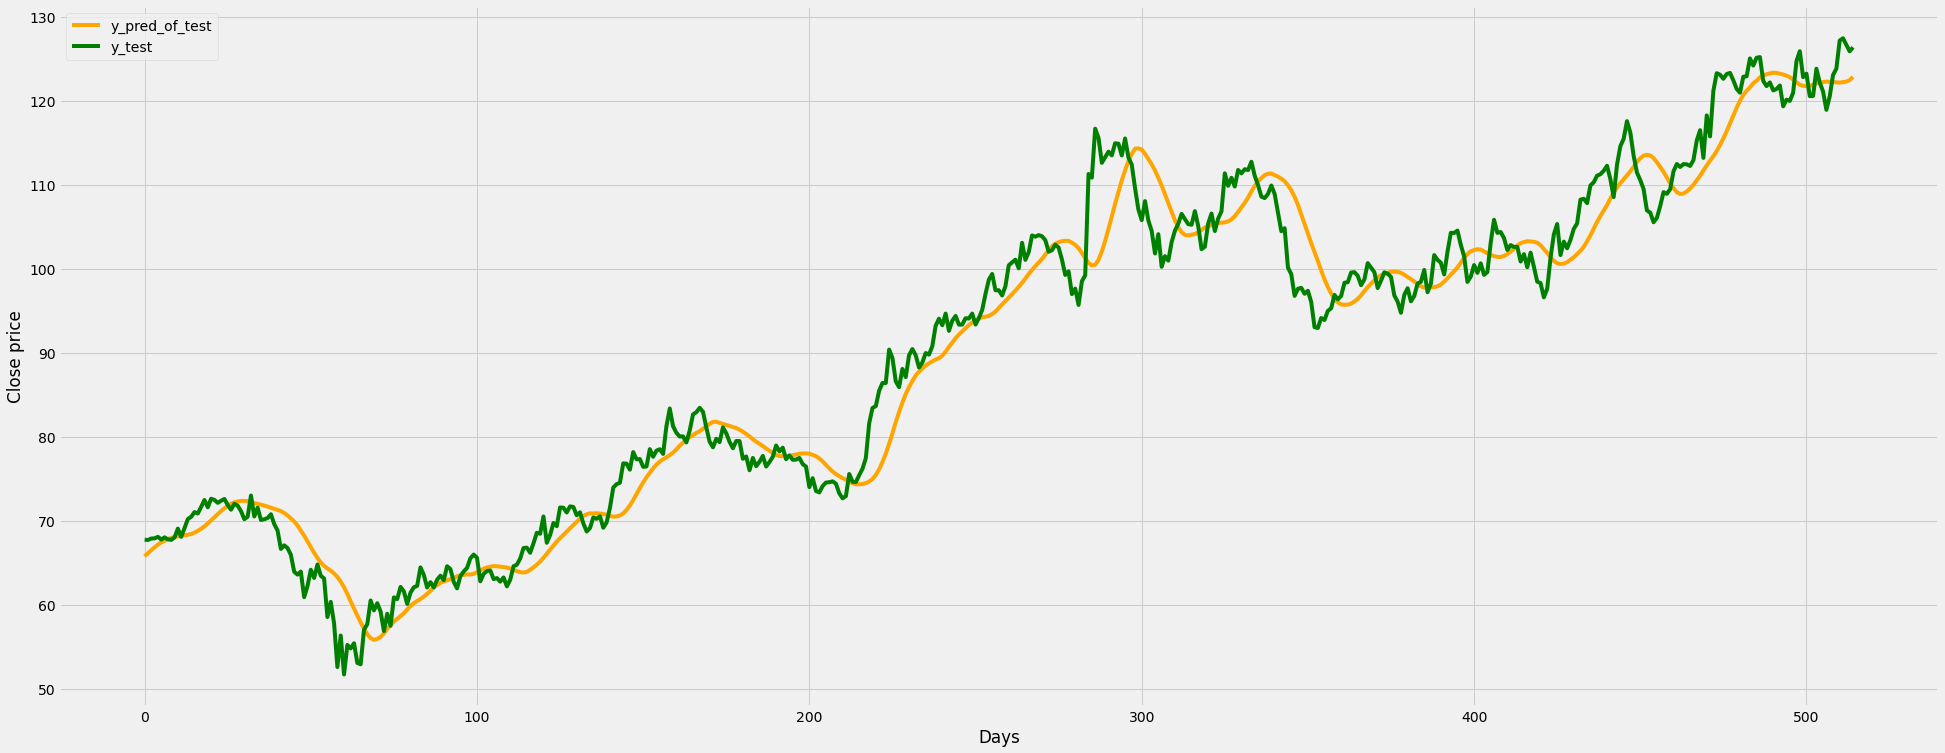

time: 600 ms (started: 2022-11-14 05:09:24 +00:00)


In [ ]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(GRU_model.predict(X14_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y14_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Close price")
# plt.title("GRU model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [ ]:
GRU14_model = scaler.inverse_transform(GRU_model.predict(X14_test)) - scaler.inverse_transform(y14_test)
print(f'Max error: {np.max(np.abs(GRU14_model)):.2f}')
print(f'Min error: {np.min(np.abs(GRU14_model)):.2f}')
print(f'Mean error: {np.mean(np.abs(GRU14_model)):.2f}')

17/17 [==============================] - 0s 7ms/step
Max error: 16.22
Min error: 0.01
Mean error: 3.00
time: 204 ms (started: 2022-11-14 05:09:29 +00:00)


### Interval 50

In [ ]:
X50_train, y50_train = generate_intervalDs(trainDsS, 50)
y50_train = scaler.fit_transform(y50_train)

testDs = np.reshape(testData.Close.values, (-1,1))
#Normalisation
scaler = MinMaxScaler(feature_range = (0,1))
testDsS = scaler.fit_transform(testDs)
X50_test, y50_test = generate_intervalDs(testDsS, 50, 'test')

Shape of X before reshape : (1184, 50, 1)
Shape of y before reshape : (1184, 1)
Shape of X before reshape : (479, 50, 1)
Shape of y before reshape : (479, 1)
time: 13.2 ms (started: 2022-11-14 04:49:53 +00:00)


In [ ]:
# The GRU architecture
GRU_model = Sequential()

GRU_model.add(GRU(units=30,  activation = "tanh", return_sequences = True, input_shape=(X50_train.shape[1],1)))

GRU_model.add(GRU(units=30, activation = "tanh", return_sequences = True))

GRU_model.add(GRU(units=30, activation = "tanh", return_sequences = True))

GRU_model.add(GRU(units=30, activation='tanh'))
# GRU_model.add(Dropout(0.2))

GRU_model.add(Dense(units=1))
# Compiling the RNN
GRU_model.compile(optimizer = "adam", loss = "mean_squared_error",metrics = ["accuracy"])

history7 = GRU_model.fit(X50_train, X50_train,epochs=50,batch_size=32)

Epoch 1/50
37/37 [==============================] - 9s 61ms/step - loss: 0.0330 - accuracy: 1.3514e-04
Epoch 2/50
37/37 [==============================] - 2s 57ms/step - loss: 0.0039 - accuracy: 1.3514e-04
Epoch 3/50
37/37 [==============================] - 2s 63ms/step - loss: 0.0036 - accuracy: 1.3514e-04
Epoch 4/50
37/37 [==============================] - 3s 84ms/step - loss: 0.0033 - accuracy: 1.3514e-04
Epoch 5/50
37/37 [==============================] - 3s 89ms/step - loss: 0.0032 - accuracy: 1.3514e-04
Epoch 6/50
37/37 [==============================] - 3s 88ms/step - loss: 0.0029 - accuracy: 1.3514e-04
Epoch 7/50
37/37 [==============================] - 3s 83ms/step - loss: 0.0027 - accuracy: 1.3514e-04
Epoch 8/50
37/37 [==============================] - 4s 97ms/step - loss: 0.0025 - accuracy: 1.3514e-04
Epoch 9/50
37/37 [==============================] - 3s 85ms/step - loss: 0.0024 - accuracy: 1.3514e-04
Epoch 10/50
37/37 [==============================] - 4s 113ms/step - loss

15/15 [==============================] - 2s 24ms/step


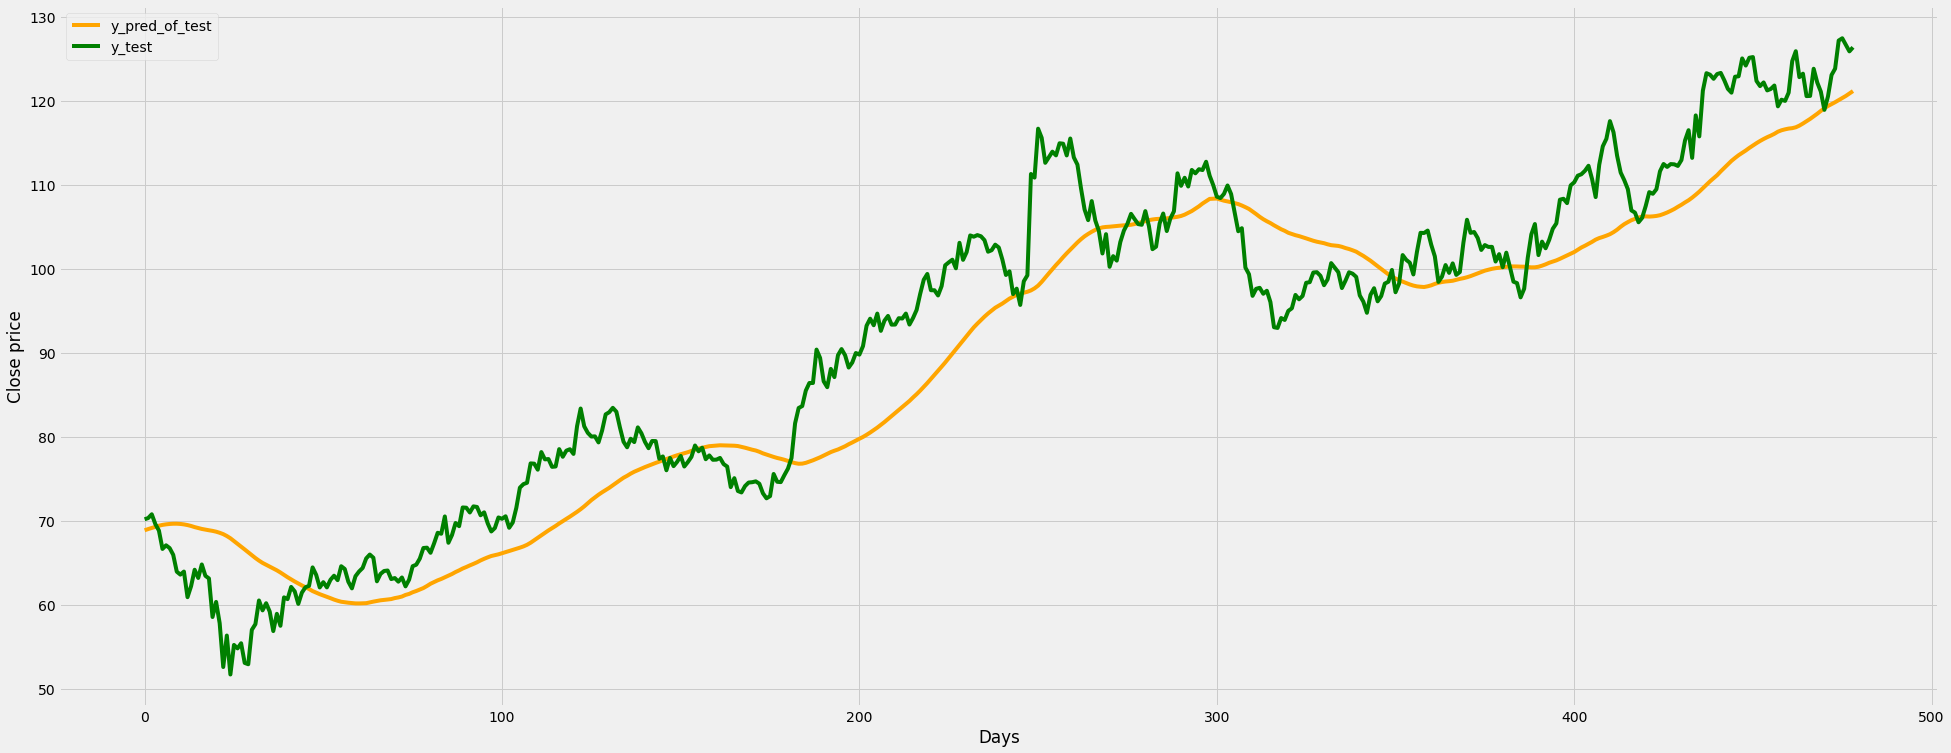

time: 2.41 s (started: 2022-11-14 05:03:29 +00:00)


In [ ]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(GRU_model.predict(X50_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y50_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Close price")
# plt.title("GRU model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [ ]:
GRU50_model = scaler.inverse_transform(GRU_model.predict(X50_test)) - scaler.inverse_transform(y50_test)
print(f'Max error: {np.max(np.abs(GRU50_model)):.2f}')
print(f'Min error: {np.min(np.abs(GRU50_model)):.2f}')
print(f'Mean error: {np.mean(np.abs(GRU50_model)):.2f}')

15/15 [==============================] - 0s 23ms/step
Max error: 18.70
Min error: 0.00
Mean error: 5.63
time: 690 ms (started: 2022-11-14 05:03:32 +00:00)


### Interval 90

In [ ]:
X90_train, y90_train = generate_intervalDs(trainDsS, 90)
y90_train = scaler.fit_transform(y90_train)

testDs = np.reshape(testData.Close.values, (-1,1))
#Normalisation
scaler = MinMaxScaler(feature_range = (0,1))
testDsS = scaler.fit_transform(testDs)
X90_test, y90_test = generate_intervalDs(testDsS, 90, 'test')

Shape of X before reshape : (1144, 90, 1)
Shape of y before reshape : (1144, 1)
Shape of X before reshape : (439, 90, 1)
Shape of y before reshape : (439, 1)
time: 11.9 ms (started: 2022-11-14 04:55:23 +00:00)


In [ ]:
# The GRU architecture
GRU_model = Sequential()

GRU_model.add(GRU(units=30,  activation = "tanh", return_sequences = True, input_shape=(X90_train.shape[1],1)))

GRU_model.add(GRU(units=30, activation = "tanh", return_sequences = True))

GRU_model.add(GRU(units=30, activation = "tanh", return_sequences = True))

GRU_model.add(GRU(units=30, activation='tanh'))
# GRU_model.add(Dropout(0.2))

GRU_model.add(Dense(units=1))
# Compiling the RNN
GRU_model.compile(optimizer = "adam", loss = "mean_squared_error",metrics = ["accuracy"])

history8 = GRU_model.fit(X90_train, X90_train,epochs=50,batch_size=32)

Epoch 1/50
36/36 [==============================] - 15s 150ms/step - loss: 0.0536 - accuracy: 6.7988e-05
Epoch 2/50
36/36 [==============================] - 5s 149ms/step - loss: 0.0083 - accuracy: 7.7700e-05
Epoch 3/50
36/36 [==============================] - 5s 149ms/step - loss: 0.0072 - accuracy: 7.7700e-05
Epoch 4/50
36/36 [==============================] - 5s 148ms/step - loss: 0.0069 - accuracy: 7.7700e-05
Epoch 5/50
36/36 [==============================] - 5s 147ms/step - loss: 0.0066 - accuracy: 7.7700e-05
Epoch 6/50
36/36 [==============================] - 7s 190ms/step - loss: 0.0061 - accuracy: 7.7700e-05
Epoch 7/50
36/36 [==============================] - 6s 151ms/step - loss: 0.0053 - accuracy: 7.7700e-05
Epoch 8/50
36/36 [==============================] - 6s 175ms/step - loss: 0.0049 - accuracy: 7.7700e-05
Epoch 9/50
36/36 [==============================] - 6s 154ms/step - loss: 0.0047 - accuracy: 7.7700e-05
Epoch 10/50
36/36 [==============================] - 5s 151ms/s

14/14 [==============================] - 2s 32ms/step


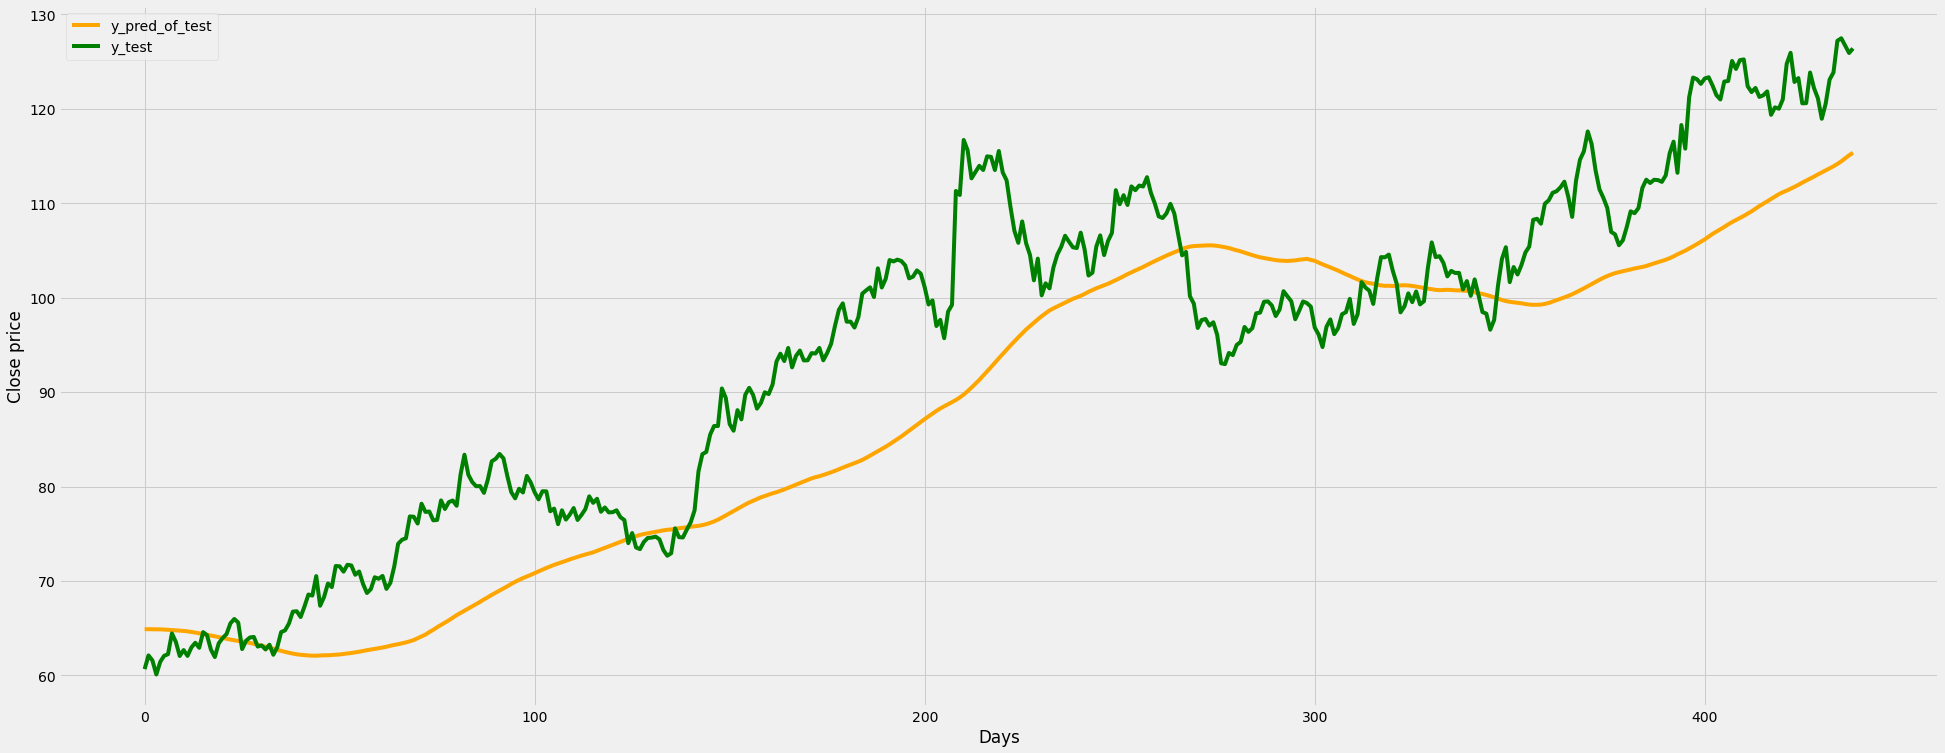

time: 3.55 s (started: 2022-11-14 05:00:54 +00:00)


In [ ]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(GRU_model.predict(X90_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y90_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Close price")
# plt.title("GRU model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [ ]:
GRU90_model = scaler.inverse_transform(GRU_model.predict(X90_test)) - scaler.inverse_transform(y90_test)
print(f'Max error: {np.max(np.abs(GRU90_model)):.2f}')
print(f'Min error: {np.min(np.abs(GRU90_model)):.2f}')
print(f'Mean error: {np.mean(np.abs(GRU90_model)):.2f}')

14/14 [==============================] - 0s 35ms/step
Max error: 26.97
Min error: 0.01
Mean error: 8.20
time: 717 ms (started: 2022-11-14 05:00:58 +00:00)


# Hyperparameter tunning

In [ ]:
!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 8.7 MB/s 
time: 4.95 s (started: 2022-11-14 06:44:02 +00:00)


In [ ]:
import tensorflow as tf
from tensorflow import keras
import keras_tuner
from kerastuner import HyperParameter
from kerastuner.tuners import RandomSearch, BayesianOptimization, Hyperband

def build_model(hp):
  hp_optimizer = hp.Choice('optimizer', values=['SGD','Adam'])
  optimizer = tf.keras.optimizers.get(hp_optimizer)
  optimizer.learning_rate = hp.Choice("learning_rate", [0.1, 1e-2, 1e-3, 1e-4, 1e-5], default=0.001)
  dropout = hp.Choice('dropout', values=[0., 0.1, 0.25, 0.5])
  units= hp.Choice('units', values=[16,32,64])

  model = keras.models.Sequential()

  model.add(GRU(units=units,  activation = "tanh", return_sequences = True, input_shape=(X_train.shape[1],1), dropout=dropout))
  model.add(GRU(units=units, activation = "tanh", return_sequences = True))
  model.add(GRU(units=units, activation = "tanh", return_sequences = True))
  model.add(GRU(units=units, activation='tanh'))
  model.add(Dense(units=1, activation=hp.Choice('dense_activation',values=['relu', 'sigmoid'] ,default='relu')))
  # Compiling the RNN
  model.compile(optimizer = optimizer, loss = "mean_squared_error",metrics = ["mse","accuracy"])

  return model

time: 5.77 ms (started: 2022-11-14 06:54:58 +00:00)


In [ ]:
hyperband_tuner = Hyperband(
    hypermodel=build_model,
    objective=["val_mse","accuracy"],
    max_epochs=15,
    factor=3,
    hyperband_iterations=30,
    directory=".",
    project_name="keras_trial",
    overwrite=True
)
hyperband_tuner.search(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Trial 293 Complete [00h 00m 23s]
multi_objective: 0.0026687594363465905

Best multi_objective So Far: -0.00026507198344916105
Total elapsed time: 02h 22m 25s
time: 2h 22min 26s (started: 2022-11-14 07:00:56 +00:00)


In [ ]:
best_Hps=hyperband_tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The hyperparameter search is complete... \n
The optimal learning rate for the optimizer is {best_Hps.get('learning_rate')}.\n
The optimal  optimizer is {best_Hps.get('optimizer')}.
""")


The hyperparameter search is complete... 

The optimal learning rate for the optimizer is 0.01.

The optimal  optimizer is Adam.

time: 4.17 ms (started: 2022-11-14 09:56:01 +00:00)


In [ ]:
hyperband_tuner.results_summary()

Results summary
Results in ./keras_trial
Showing 10 best trials
Trial summary
Hyperparameters:
optimizer: Adam
learning_rate: 0.01
dropout: 0.0
units: 64
dense_activation: sigmoid
tuner/epochs: 15
tuner/initial_epoch: 5
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0252
Score: -0.00026507198344916105
Trial summary
Hyperparameters:
optimizer: Adam
learning_rate: 0.01
dropout: 0.0
units: 16
dense_activation: sigmoid
tuner/epochs: 15
tuner/initial_epoch: 5
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0072
Score: -0.00022873416310176253
Trial summary
Hyperparameters:
optimizer: Adam
learning_rate: 0.01
dropout: 0.0
units: 32
dense_activation: sigmoid
tuner/epochs: 15
tuner/initial_epoch: 5
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0253
Score: -0.00015001947758719325
Trial summary
Hyperparameters:
optimizer: Adam
learning_rate: 0.01
dropout: 0.0
units: 64
dense_activation: sigmoid
tuner/epochs: 5
tuner/initial_epoch: 2
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: 0245
Score: -

In [ ]:
hypermodel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (None, 30, 64)            12864     
                                                                 
 gru_13 (GRU)                (None, 30, 64)            24960     
                                                                 
 gru_14 (GRU)                (None, 30, 64)            24960     
                                                                 
 gru_15 (GRU)                (None, 64)                24960     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 87,809
Trainable params: 87,809
Non-trainable params: 0
_________________________________________________________________
time: 48.8 ms (started: 2022-11-15 08:56:11 +00:00

In [ ]:
hypermodel = hyperband_tuner.hypermodel.build(best_Hps)
history11 = hypermodel.fit(X_train, y_train, epochs=50)

Epoch 1/50
38/38 [==============================] - 13s 66ms/step - loss: 0.0098 - mse: 0.0098 - accuracy: 8.3056e-04
Epoch 2/50
38/38 [==============================] - 2s 65ms/step - loss: 0.0012 - mse: 0.0012 - accuracy: 8.3056e-04
Epoch 3/50
38/38 [==============================] - 2s 64ms/step - loss: 5.5993e-04 - mse: 5.5993e-04 - accuracy: 8.3056e-04
Epoch 4/50
38/38 [==============================] - 2s 66ms/step - loss: 6.8826e-04 - mse: 6.8826e-04 - accuracy: 8.3056e-04
Epoch 5/50
38/38 [==============================] - 4s 119ms/step - loss: 8.8046e-04 - mse: 8.8046e-04 - accuracy: 8.3056e-04
Epoch 6/50
38/38 [==============================] - 4s 109ms/step - loss: 5.5115e-04 - mse: 5.5115e-04 - accuracy: 8.3056e-04
Epoch 7/50
38/38 [==============================] - 3s 71ms/step - loss: 5.8431e-04 - mse: 5.8431e-04 - accuracy: 8.3056e-04
Epoch 8/50
38/38 [==============================] - 2s 64ms/step - loss: 4.9894e-04 - mse: 4.9894e-04 - accuracy: 8.3056e-04
Epoch 9/50
38

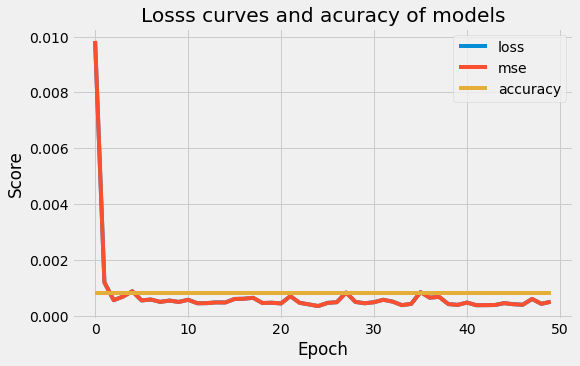

time: 211 ms (started: 2022-11-14 10:06:27 +00:00)


In [ ]:
pd.DataFrame(history11.history).plot(figsize=(8 , 5))
plt.title("Losss curves and acuracy of models")
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.show()

16/16 [==============================] - 2s 16ms/step


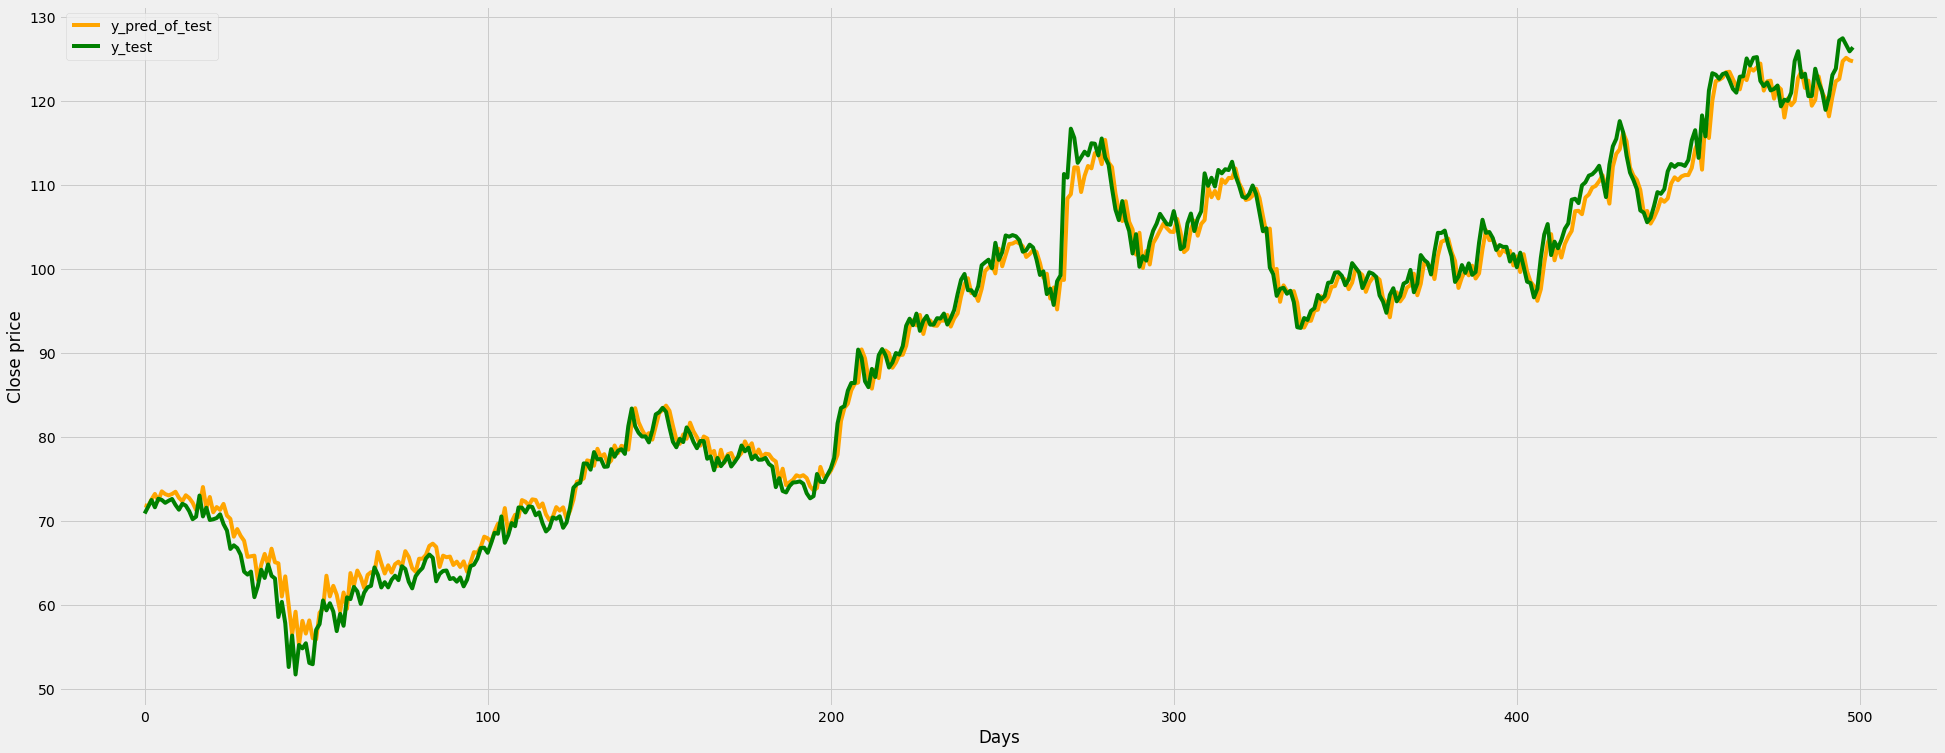

time: 2.5 s (started: 2022-11-14 10:02:20 +00:00)


In [ ]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(hypermodel.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Close price")
# plt.title("GRU model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [ ]:
hyper_model_er = scaler.inverse_transform(hypermodel.predict(X_test)) - scaler.inverse_transform(y_test)
print(f'Max error: {np.max(np.abs(hyper_model_er)):.2f}')
print(f'Min error: {np.min(np.abs(hyper_model_er)):.2f}')
print(f'Mean error: {np.mean(np.abs(hyper_model_er)):.2f}')

16/16 [==============================] - 0s 17ms/step
Max error: 12.62
Min error: 0.00
Mean error: 1.52
time: 385 ms (started: 2022-11-14 10:03:22 +00:00)


In [ ]:
# !mkdir -p saved_model
hypermodel.save('saved_model/hypermodel') 

time: 18.9 s (started: 2022-11-14 10:12:29 +00:00)


In [ ]:
from tensorflow import keras
hypermodel = keras.models.load_model('saved_model/hypermodel')

time: 14 s (started: 2022-11-15 08:55:28 +00:00)
